# UCLA CS M148 Final Project - 24 Fall
by: Morgan Mason, Andrew Zhang, Pallavi Srinivas

In this project, we explored a dataset that collected information about students and their test scores. \
We wish to explore how these factors contribute to students improving their test scores

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn torch plotly

download the following dataset and store it in the same directory as this notebook as a csv named "StudentPerformanceFactors.csv"

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# i) Exploratory Data Analysis

in this section we will be exploring the our data

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
# loading data and taking sample
original_dataset_df = pd.read_csv("StudentPerformanceFactors.csv")
original_dataset_df.sample(10)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
1873             25          98               Medium              Medium   
4437             18          61               Medium                 Low   
6348             13          95                 High                High   
6109             16          78               Medium              Medium   
3009             17          82                  Low              Medium   
810              19          98               Medium                High   
2204             14          94                  Low              Medium   
1287             23          63               Medium              Medium   
3757             32          61                 High              Medium   
3890             24          80               Medium                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
1873                        Yes            9               84   
4437                         No            7               67   
6348                        Yes            5               92   
6109                        Yes            4               78   
3009                        Yes            9               63   
810                          No            9               90   
2204                         No            6               60   
1287                         No            8               69   
3757                        Yes            7               69   
3890                         No            5               51   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
1873           Medium             Yes                  1        Medium   
4437              Low             Yes                  2          High   
6348              Low             Yes                  1        Medium   
6109           Medium             Yes                  5          High   
3009           Medium             Yes                  2           Low   
810               Low              No                  1          High   
2204           Medium             Yes                  3          High   
1287             High             Yes                  2        Medium   
3757             High             Yes                  0          High   
3890           Medium             Yes                  3          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
1873            High     Private        Neutral                  2   
4437          Medium      Public       Positive                  4   
6348          Medium     Private       Positive                  2   
6109          Medium      Public       Positive                  3   
3009          Medium     Private        Neutral                  2   
810           Medium     Private       Positive                  2   
2204          Medium      Public        Neutral                  3   
1287             Low      Public       Negative                  4   
3757          Medium      Public       Positive                  3   
3890             Low      Public       Positive                  2   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
1873                    No             Postgraduate               Near   
4437                    No              High School               Near   
6348                    No                  College               Near   
6109                    No              High School               Near   
3009                    No                  College           Moderate   
810                     No                  College                Far   
2204                    No                  College                NaN   
1287                   Yes              High School               Near   
3757                    No              High School           Moderate   
3890                    No              High School               Near   

      Gender  Exam_Score  
1873  Female          73 

from : https://www.kaggle.com/datasets/lainguyn123/student-performance-factors


## what does each var measure


the kaggle website includes a table of variables and what they measure
- however, some categorical variables do not clarify how category was determined or what they mean

### About the Dataset
(https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

| Attribute | Description |
|---|---|
| Hours_Studied | Number of hours spent studying per week. |
| Attendance | Percentage of classes attended. |
| Parental_Involvement | Level of parental involvement in the student's education (Low, Medium, High). |
| Access_to_Resources | Availability of educational resources (Low, Medium, High). |
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No). |
| Sleep_Hours | Average number of hours of sleep per night. |
| Previous_Scores | Scores from previous exams. |
| Motivation_Level | Student's level of motivation (Low, Medium, High). |
| Internet_Access | Availability of internet access (Yes, No). |
| Tutoring_Sessions | Number of tutoring sessions attended per month. |
| Family_Income | Family income level (Low, Medium, High). |
| Teacher_Quality | Quality of the teachers (Low, Medium, High). |
| School_Type | Type of school attended (Public, Private). |
| Peer_Influence | Influence of peers on academic performance (Positive, Neutral, Negative). |
| Physical_Activity | Average number of hours of physical activity per week. |
| Learning_Disabilities | Presence of learning disabilities (Yes, No). |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate). |
| Distance_from_Home | Distance from home to school (Near, Moderate, Far). |
| Gender | Gender of the student (Male, Female). |
| Exam_Score | Final exam score. |


### how was data collected
according to documentation, it is synthetic data

### observational units
each observation is a single student

### data relevancy
Hours_Studied, Previous_Scores, Motivation_Level, Exam_Score are the most relevant fields for our exploration in.

Other variables we might want to explore include: parental involvement, access to resources, tutoring sessions, peer influence

### questions, assumptions
- How is motivation level measured, what does it represent
- will motivation level be too correlated with other variables (hours studied) 

## Exploring data

In [4]:
# shape of df
original_dataset_df.shape

(6607, 20)

we have 20 variables and 6607 samples

In [5]:
original_dataset_df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [6]:
original_dataset_df[original_dataset_df['Exam_Score']>100]

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
1525             27          98                  Low              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
1525                        Yes            6               93   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
1525              Low              No                  5          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
1525            High      Public       Positive                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
1525                    No              High School           Moderate   

      Gender  Exam_Score  
1525  Female         101

<Axes: >

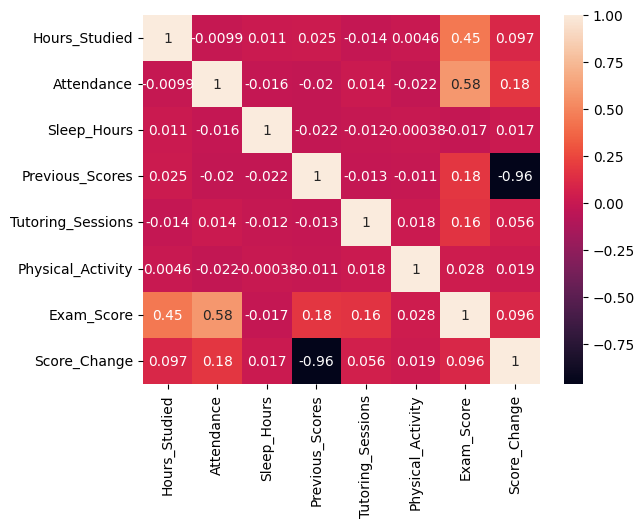

In [7]:
numerical_cols = original_dataset_df.select_dtypes(include=["int64"]).columns
corr_ds = original_dataset_df[numerical_cols].copy()
corr_ds["Score_Change"] = corr_ds["Exam_Score"] - corr_ds["Previous_Scores"] 
sns.heatmap(corr_ds.corr(), annot=True)


In [8]:
(original_dataset_df['Exam_Score'] <= original_dataset_df['Previous_Scores']).sum(), (original_dataset_df['Exam_Score'] > original_dataset_df['Previous_Scores']).sum()

(4467, 2140)

Notes on distribution of data
- hours studies: the information seems reasonable though the max does seem high\
- exam scores : the max says there was an exam score of 101- this doesn't seem appropriate
  - because there was only one such outlier, we will remove it later
- hours studied and attendance have the highest correlation with exam scores
  - previous score are highly negatively correlated
- we have more examples of students not improving than students improving


In [9]:
for column in original_dataset_df.columns:
    print(f"Column: {column}, Data Type: {original_dataset_df[column].dtype}")
    if original_dataset_df[column].dtype == 'object':
        print(f"Categories: {original_dataset_df[column].unique()}")
    if original_dataset_df[column].dtype in ['int64', 'float64']:
        print(f"5-Number Summary: \n{original_dataset_df[column].describe()[['min', '25%', '50%', '75%', 'max']]}")
        print(f"Mean: {original_dataset_df[column].mean():.5}")
        print(f"Standard Deviation: {original_dataset_df[column].std():.5}")
        print(f"Skewness: {original_dataset_df[column].skew():.5}")
        print(f"Kurtosis: {original_dataset_df[column].kurt():.5}")
    print("-" * 20)

Column: Hours_Studied, Data Type: int64
5-Number Summary: 
min     1.0
25%    16.0
50%    20.0
75%    24.0
max    44.0
Name: Hours_Studied, dtype: float64
Mean: 19.975
Standard Deviation: 5.9906
Skewness: 0.013499
Kurtosis: 0.017771
--------------------
Column: Attendance, Data Type: int64
5-Number Summary: 
min     60.0
25%     70.0
50%     80.0
75%     90.0
max    100.0
Name: Attendance, dtype: float64
Mean: 79.977
Standard Deviation: 11.547
Skewness: 0.013666
Kurtosis: -1.1944
--------------------
Column: Parental_Involvement, Data Type: object
Categories: ['Low' 'Medium' 'High']
--------------------
Column: Access_to_Resources, Data Type: object
Categories: ['High' 'Medium' 'Low']
--------------------
Column: Extracurricular_Activities, Data Type: object
Categories: ['No' 'Yes']
--------------------
Column: Sleep_Hours, Data Type: int64
5-Number Summary: 
min     4.0
25%     6.0
50%     7.0
75%     8.0
max    10.0
Name: Sleep_Hours, dtype: float64
Mean: 7.0291
Standard Deviation: 1

In [10]:
score_change = original_dataset_df["Exam_Score"] - original_dataset_df["Previous_Scores"]  
print(f"5-Number Summary: \n{score_change.describe()[['min', '25%', '50%', '75%', 'max']]}")
print(f"Mean: {score_change.mean():.5}")
print(f"Standard Deviation: {score_change.std():.5}")
print(f"Skewness: {score_change.skew():.5}")
print(f"Kurtosis: {score_change.kurt():.5}")


5-Number Summary: 
min   -39.0
25%   -20.0
50%    -8.0
75%     4.0
max    41.0
dtype: float64
Mean: -7.8349
Standard Deviation: 14.243
Skewness: 0.036157
Kurtosis: -0.96563


count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64
----


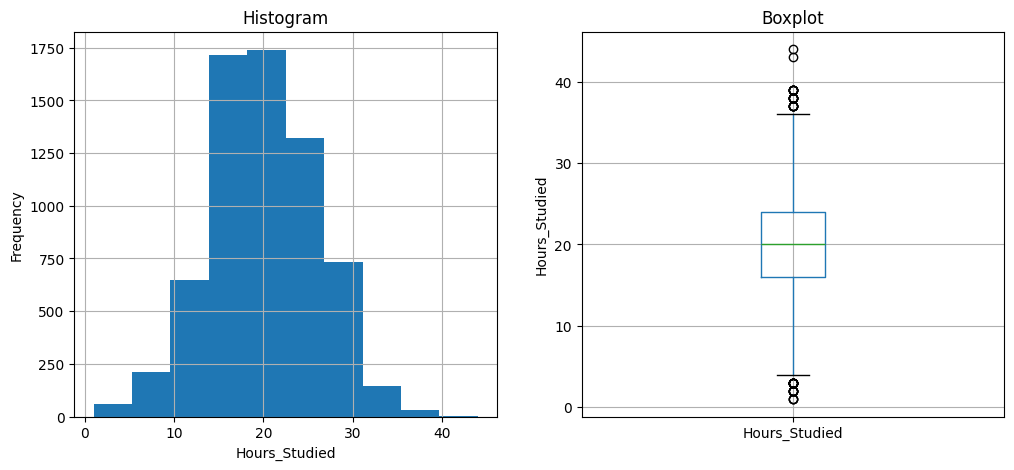

count    6607.000000
mean       79.977448
std        11.547475
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64
----


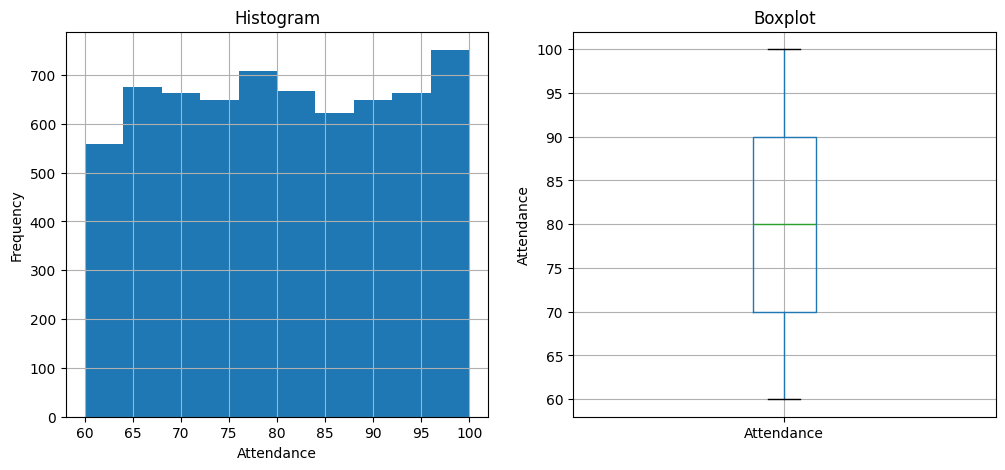

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
----
count       6607
unique         3
top       Medium
freq        3362
Name: Parental_Involvement, dtype: object
----


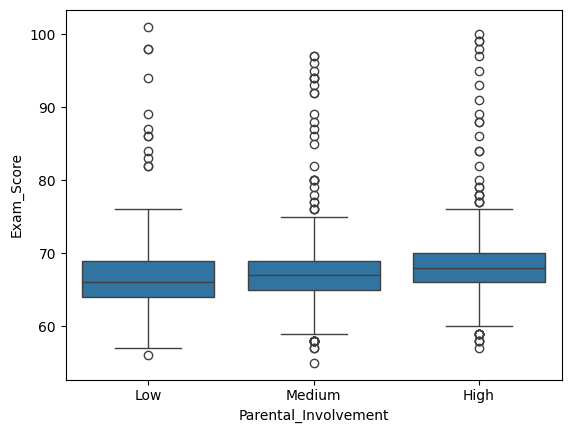

Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
----
count       6607
unique         3
top       Medium
freq        3319
Name: Access_to_Resources, dtype: object
----


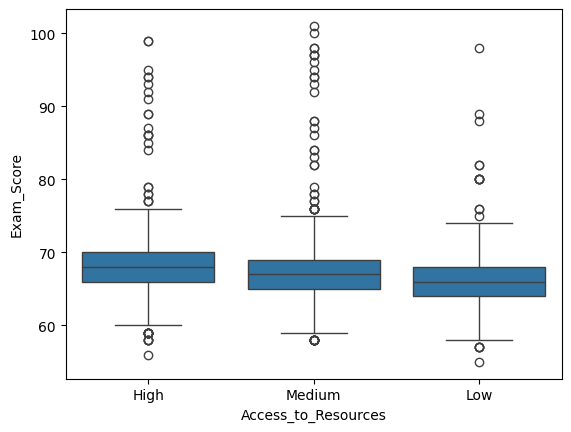

Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
----
count     6607
unique       2
top        Yes
freq      3938
Name: Extracurricular_Activities, dtype: object
----


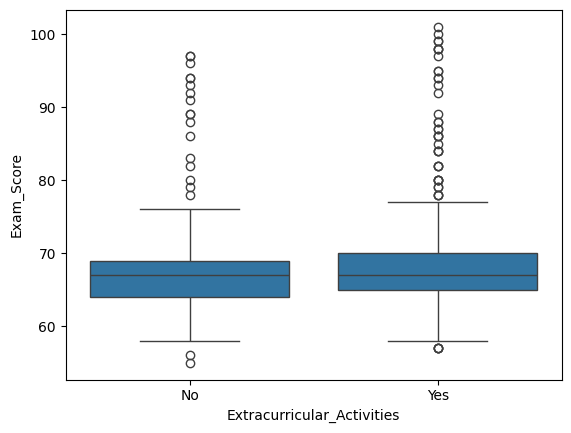

count    6607.00000
mean        7.02906
std         1.46812
min         4.00000
25%         6.00000
50%         7.00000
75%         8.00000
max        10.00000
Name: Sleep_Hours, dtype: float64
----


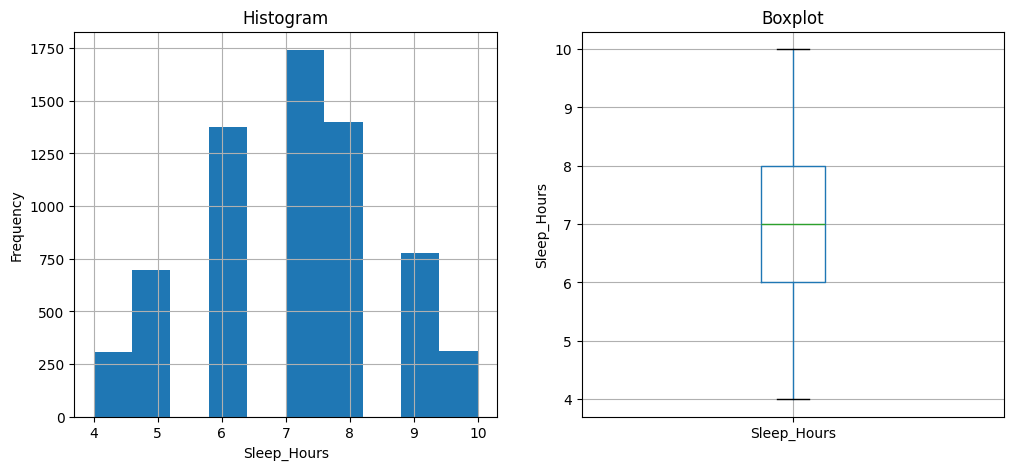

count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64
----


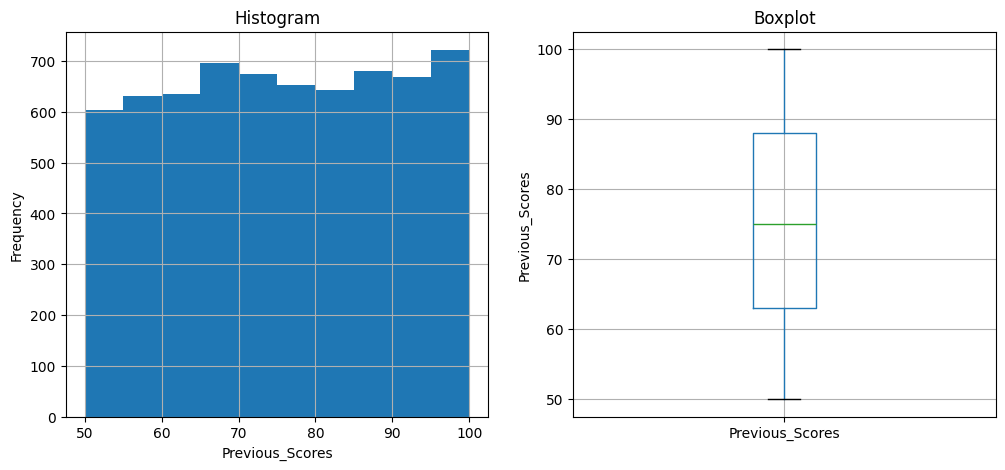

Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
----
count       6607
unique         3
top       Medium
freq        3351
Name: Motivation_Level, dtype: object
----


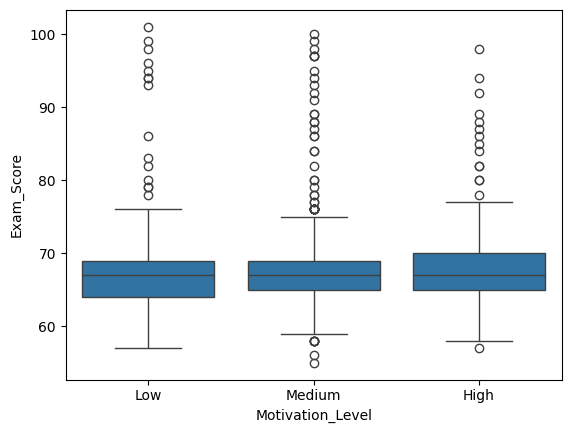

Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
----
count     6607
unique       2
top        Yes
freq      6108
Name: Internet_Access, dtype: object
----


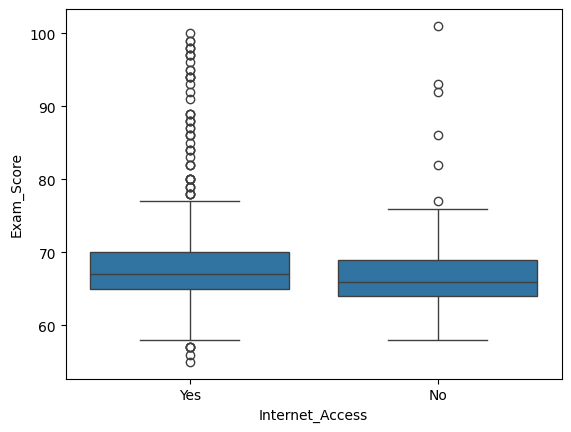

count    6607.000000
mean        1.493719
std         1.230570
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64
----


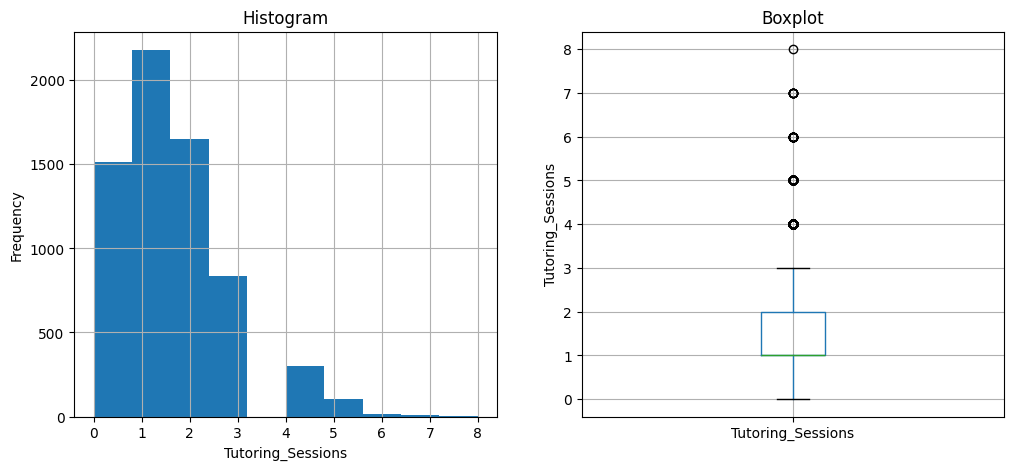

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
----
count     6607
unique       3
top        Low
freq      2672
Name: Family_Income, dtype: object
----


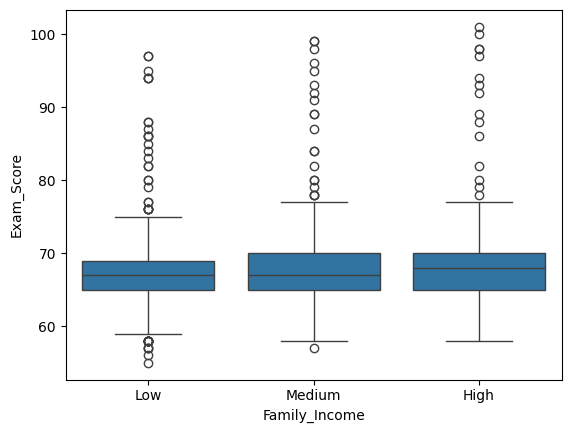

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
----
count       6529
unique         3
top       Medium
freq        3925
Name: Teacher_Quality, dtype: object
----


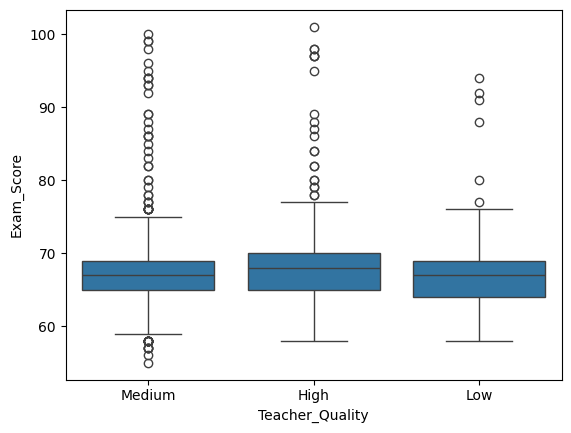

School_Type
Public     4598
Private    2009
Name: count, dtype: int64
----
count       6607
unique         2
top       Public
freq        4598
Name: School_Type, dtype: object
----


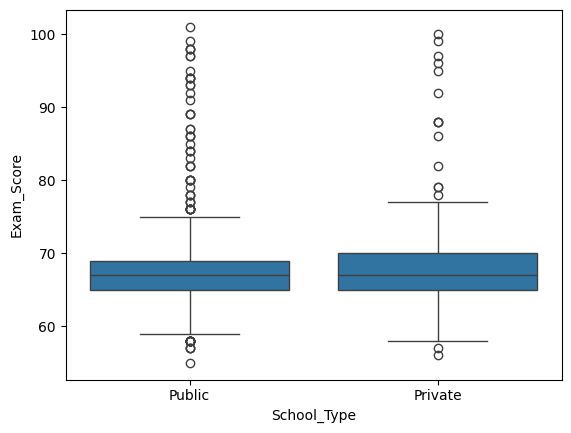

Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
----
count         6607
unique           3
top       Positive
freq          2638
Name: Peer_Influence, dtype: object
----


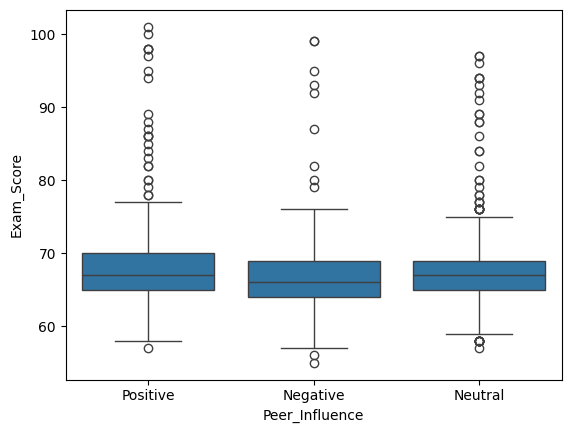

count    6607.000000
mean        2.967610
std         1.031231
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64
----


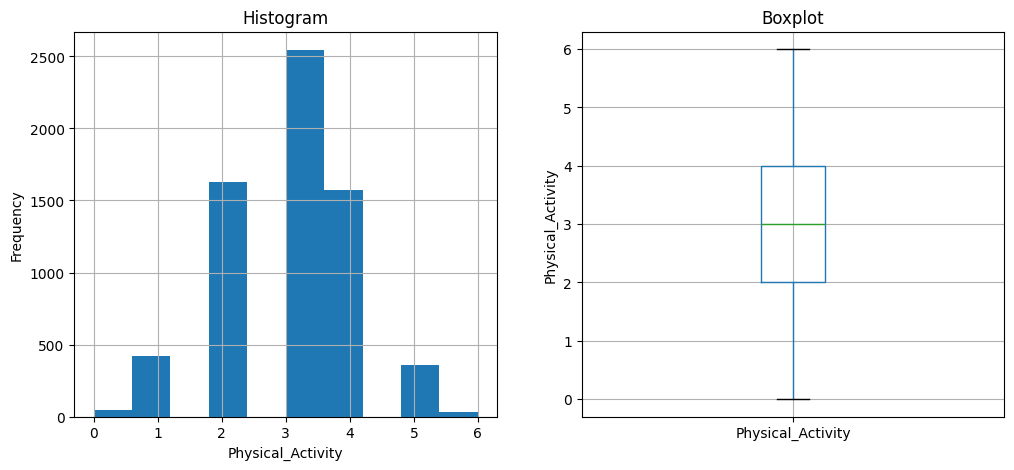

Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
----
count     6607
unique       2
top         No
freq      5912
Name: Learning_Disabilities, dtype: object
----


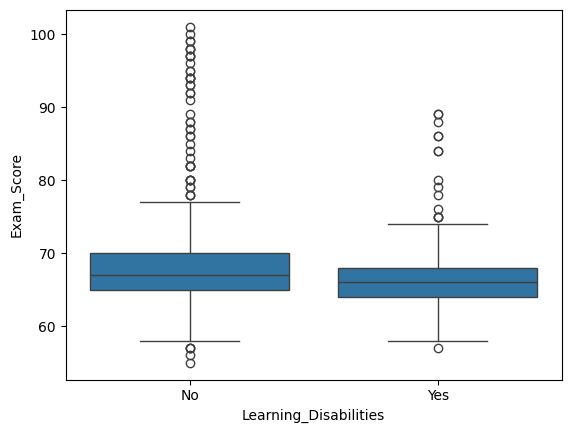

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
----
count            6517
unique              3
top       High School
freq             3223
Name: Parental_Education_Level, dtype: object
----


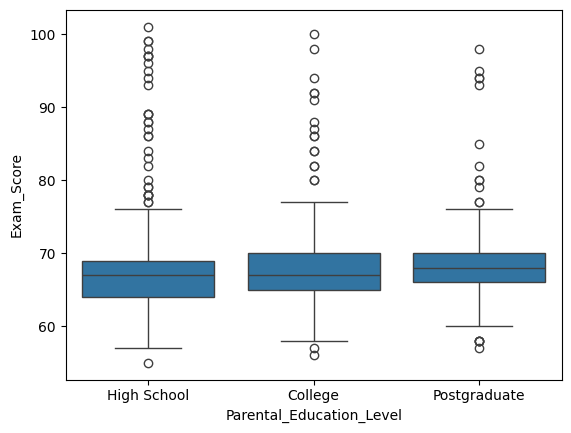

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64
----
count     6540
unique       3
top       Near
freq      3884
Name: Distance_from_Home, dtype: object
----


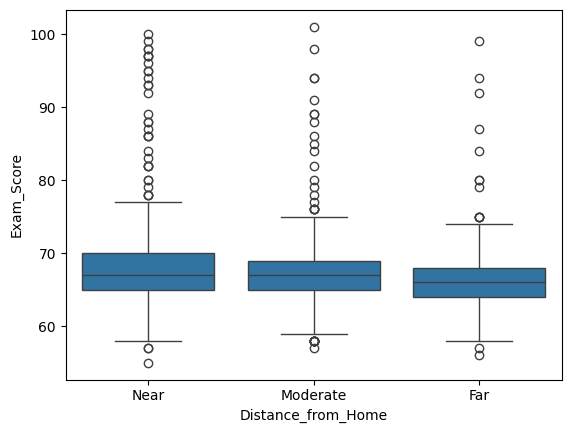

Gender
Male      3814
Female    2793
Name: count, dtype: int64
----
count     6607
unique       2
top       Male
freq      3814
Name: Gender, dtype: object
----


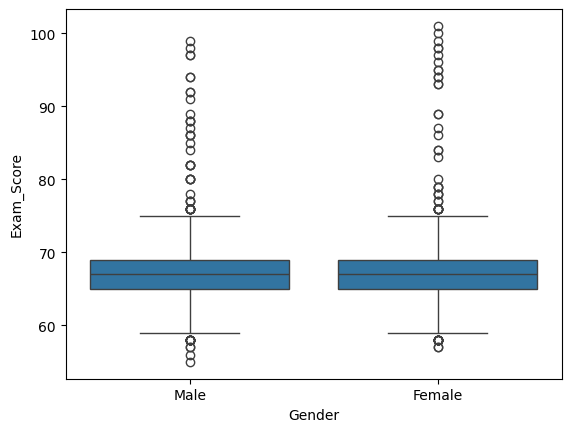

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64
----


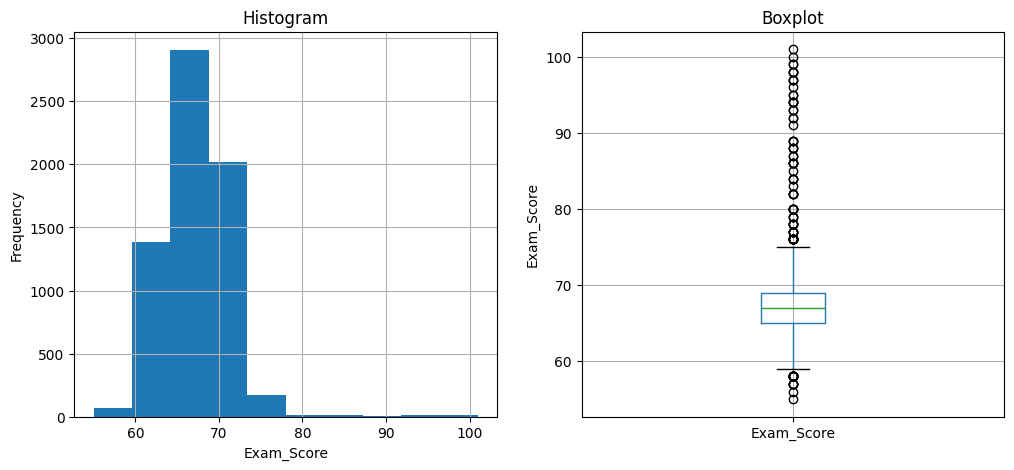

In [10]:
def explore_var(df, var):
  if df[var].dtype == "object":
    explore_cat(df, var)
  else:
    explore_num(df, var)


def explore_cat(df, var):
  print(df[var].value_counts())
  print("----")
  print(df[var].describe())
  print("----")
  sns.boxplot(x=var,y="Exam_Score", data=df)
  plt.show()


def explore_num(df, var):
  plt.figure(figsize=(12, 5))

  print(df[var].describe())
  print("----")
  plt.subplot(1, 2, 1)
  df[var].hist()
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.title('Histogram')

  plt.subplot(1, 2, 2)
  df.boxplot(column=var)
  plt.ylabel(var)
  plt.title('Boxplot')

  plt.show()

for c in original_dataset_df.columns:
  explore_var(original_dataset_df,c)

## Missing Data

In [11]:
# number of nans in each column 
nan = original_dataset_df.isna().sum()
nan[nan > 0]

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

In [12]:
nan_rows = original_dataset_df.isna().any(axis=1)
count_nan_rows = nan_rows.sum()
count_nan_rows 

229

we only have 229 data points with nans- a small proportion relative to the full 6607

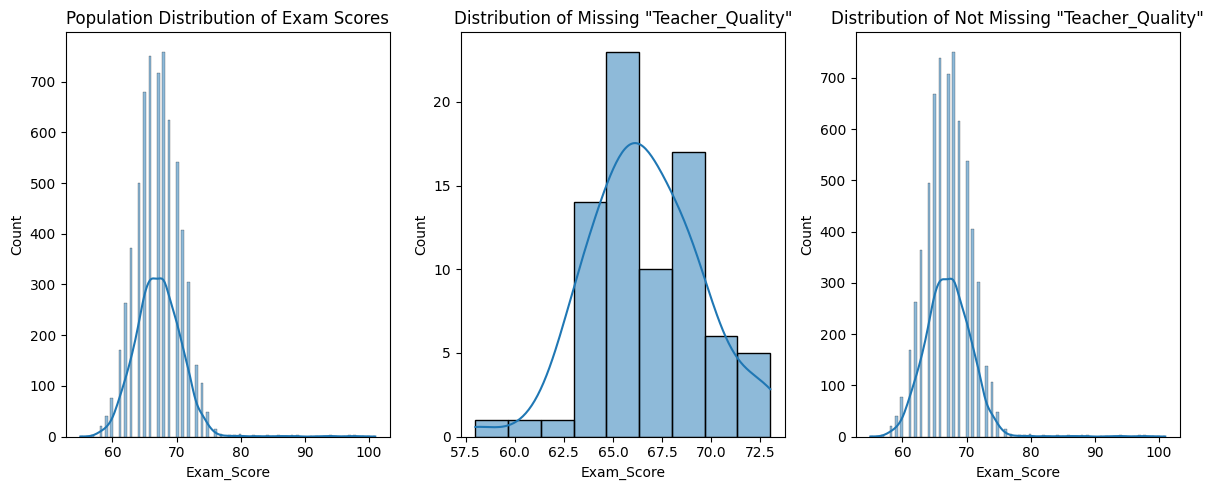

[67.23565914938702, 66.64102564102564, 67.24276305712974]


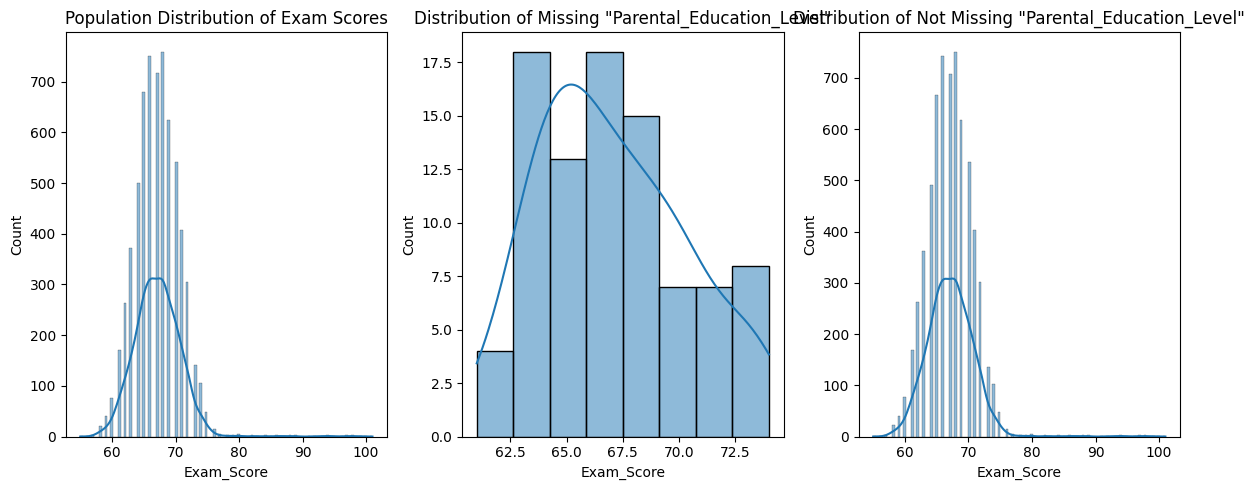

[67.23565914938702, 67.05555555555556, 67.2381463863741]


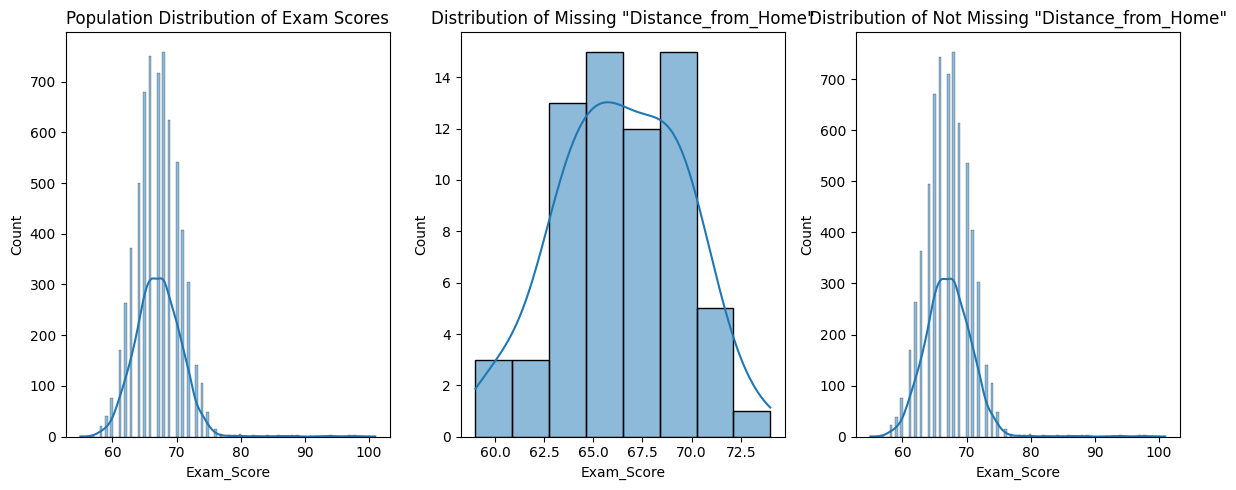

[67.23565914938702, 66.43283582089552, 67.24388379204893]


In [13]:
# Exploring the distributions between missing and non missing population
for column in original_dataset_df.columns:
    if original_dataset_df[column].isnull().any():  # Check for missing data in the column
        # Create a figure and axes for the plots   
        means = [0] * 3
        fig, axes = plt.subplots(1, 3, figsize=(12, 5))

        # Plot the distribution of exam scores for the population
        sns.histplot(original_dataset_df['Exam_Score'], ax=axes[0], kde=True)
        axes[0].set_title('Population Distribution of Exam Scores')
        means[0] = original_dataset_df["Exam_Score"].mean()

        # Plot the distribution of exam scores for the subset with missing data in the current column
        subset = original_dataset_df[original_dataset_df[column].isnull()]
        sns.histplot(subset['Exam_Score'], ax=axes[1], kde=True)
        axes[1].set_title(f'Distribution of Missing "{column}"')
        means[1] = subset["Exam_Score"].mean()

        subset = original_dataset_df[~original_dataset_df[column].isnull()]
        sns.histplot(subset['Exam_Score'], ax=axes[2], kde=True)
        axes[2].set_title(f'Distribution of Not Missing "{column}"')
        means[2] = subset["Exam_Score"].mean()

        plt.tight_layout()
        plt.show()
        print(means)

for each column with missing values, we have created a histogram to explore the distribution of
- the entire population
- the part of a population with a missing value in the column
- the part of the population without a missing value

although the missing-population has a slightly lower mean value, the difference between the total population and the not-missing population is on the order of 1/100
- for this reason, we have chosen to drop the data with missing columns

# ii) Data Preprocessing

In [14]:
import pandas as pd

We intend to perform the following transformations 
- remove any row with NAN
- remove row with Exam Score > 100 
- one-hot encode categorical variables
- create a column, improvement = Exam_Score - Previous_Scores
- rename other columns

Notes:
- 'duplicates' will be assumed to be separate students with the same metrics

In [15]:
original_dataset_df = pd.read_csv("StudentPerformanceFactors.csv")
original_dataset_df.sample(5)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6470             20          71                  Low                High   
1365             19          71                 High              Medium   
1569             17          69               Medium              Medium   
599              22          84                 High              Medium   
1654             22          91                 High                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6470                        Yes            6               63   
1365                        Yes           10               81   
1569                        Yes            7               70   
599                          No            7               81   
1654                        Yes            6               73   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6470             High             Yes                  1           Low   
1365           Medium             Yes                  2        Medium   
1569              Low             Yes                  0           Low   
599            Medium             Yes                  1        Medium   
1654              Low             Yes                  3          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
6470          Medium      Public       Positive                  2   
1365            High      Public       Positive                  3   
1569            High      Public        Neutral                  3   
599              Low     Private       Positive                  3   
1654          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
6470                    No                  College           Moderate   
1365                    No              High School               Near   
1569                   Yes                  College           Moderate   
599                     No              High School           Moderate   
1654                    No             Postgraduate               Near   

      Gender  Exam_Score  
6470    Male          65  
1365  Female          68  
1569    Male          61  
599     Male          69  
1654    Male          74

### remove nans

In [16]:
print("Original:\tany Nans?", original_dataset_df.isna().any().any())
no_nan_df = original_dataset_df.dropna()
print("New:\t\tany Nans?", no_nan_df.isna().any().any())
no_nan_df.sample(5)


Original:	any Nans? True
New:		any Nans? False


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
5863              9          93                 High                 Low   
4480             13          89                 High                High   
3722             10          71               Medium                 Low   
764              27          67                  Low              Medium   
2769             19          87                 High                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
5863                        Yes            7               66   
4480                         No            8               59   
3722                         No           10               53   
764                         Yes            6               90   
2769                         No           10               60   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
5863           Medium             Yes                  0           Low   
4480              Low             Yes                  0           Low   
3722              Low             Yes                  4          High   
764            Medium             Yes                  2          High   
2769             High             Yes                  2        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
5863             Low     Private        Neutral                  2   
4480            High      Public        Neutral                  2   
3722          Medium     Private       Positive                  3   
764             High     Private        Neutral                  3   
2769             Low     Private       Positive                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
5863                    No                  College           Moderate   
4480                    No             Postgraduate           Moderate   
3722                    No              High School               Near   
764                     No              High School           Moderate   
2769                    No              High School           Moderate   

      Gender  Exam_Score  
5863    Male          64  
4480    Male          66  
3722  Female          62  
764     Male          67  
2769    Male          69

### remove the Exam_Score > 100 because it is incorrect

In [17]:
print("Original:\t # Exam_Score>100", len(no_nan_df[no_nan_df['Exam_Score'] > 100]))
no_gt100_df = no_nan_df.drop(no_nan_df[no_nan_df["Exam_Score"] > 100].index)
print("New:\t\t # Exam_Score>100", len(no_gt100_df[no_gt100_df['Exam_Score'] > 100]))
no_gt100_df.sample(5)

Original:	 # Exam_Score>100 1
New:		 # Exam_Score>100 0


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
914              19          90                 High              Medium   
3739             12          79               Medium                 Low   
4288             29          90               Medium              Medium   
5529             19          78                  Low                High   
1195             23          92               Medium                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
914                         Yes            5               85   
3739                         No            9               80   
4288                        Yes            9               83   
5529                        Yes            9               78   
1195                         No            9               52   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
914              High             Yes                  0        Medium   
3739              Low             Yes                  1          High   
4288           Medium             Yes                  0        Medium   
5529           Medium             Yes                  2           Low   
1195             High             Yes                  1          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
914             High     Private       Positive                  5   
3739          Medium      Public       Positive                  2   
4288            High     Private       Positive                  3   
5529            High      Public       Negative                  2   
1195          Medium     Private       Positive                  2   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
914                     No             Postgraduate               Near   
3739                    No                  College           Moderate   
4288                    No              High School               Near   
5529                    No                  College               Near   
1195                    No              High School               Near   

      Gender  Exam_Score  
914   Female          73  
3739    Male          63  
4288  Female          72  
5529  Female          67  
1195  Female          71

### rename columns and other transforms

In [18]:
renames = {
    "Hours_Studied" : "Hours_Studied_Per_Week"
}
transforms = {
    #"column name" : lamda x: transform(x)
}


rename_transformed_df = no_gt100_df.rename(columns=renames)
for k, v in transforms.items():
  rename_transformed_df[k] = rename_transformed_df[k].apply(v)

rename_transformed_df.sample(5)

Hours_Studied_Per_Week  Attendance Parental_Involvement  \
2381                      14          88               Medium   
3863                      19          81               Medium   
5654                      15          68               Medium   
3607                      26          72               Medium   
5638                      18          63                 High   

     Access_to_Resources Extracurricular_Activities  Sleep_Hours  \
2381              Medium                        Yes            7   
3863                High                        Yes            9   
5654                High                         No            6   
3607              Medium                        Yes            8   
5638                High                         No            8   

      Previous_Scores Motivation_Level Internet_Access  Tutoring_Sessions  \
2381               66           Medium             Yes                  4   
3863               53           Medium             Yes                  2   
5654               55           Medium              No                  0   
3607               76           Medium             Yes                  1   
5638               82           Medium             Yes                  1   

     Family_Income Teacher_Quality School_Type Peer_Influence  \
2381        Medium            High      Public       Positive   
3863          High          Medium      Public       Positive   
5654          High          Medium     Private       Positive   
3607        Medium          Medium      Public       Negative   
5638          High          Medium     Private       Negative   

      Physical_Activity Learning_Disabilities Parental_Education_Level  \
2381                  3                    No              High School   
3863                  3                    No              High School   
5654                  3                    No              High School   
3607                  3                    No             Postgraduate   
5638                  1                    No              High School   

     Distance_from_Home  Gender  Exam_Score  
2381               Near  Female          69  
3863               Near    Male          68  
5654               Near  Female          62  
3607               Near    Male          68  
5638               Near    Male          64

### get dummy values for categorical data

In [19]:
oh_df = pd.get_dummies(rename_transformed_df, columns=rename_transformed_df.select_dtypes(include=['object']).columns)
oh_df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
1757                      26          81            5               82   
2632                      21          96            6               78   
3128                      20          88            4               54   
6450                      18          69           10               89   
3639                      23          72            8               58   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
1757                  0                  5          67   
2632                  2                  3          71   
3128                  0                  4          66   
6450                  2                  1          61   
3639                  2                  2          66   

      Parental_Involvement_High  Parental_Involvement_Low  \
1757                      False                      True   
2632                      False                      True   
3128                      False                     False   
6450                      False                      True   
3639                       True                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_No  \
1757                        False  ...                     False   
2632                        False  ...                      True   
3128                         True  ...                      True   
6450                        False  ...                     False   
3639                        False  ...                      True   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
1757                       True                             False   
2632                      False                             False   
3128                      False                             False   
6450                       True                             False   
3639                      False                              True   

      Parental_Education_Level_High School  \
1757                                 False   
2632                                  True   
3128                                  True   
6450                                  True   
3639                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
1757                                   True                   False   
2632                                  False                   False   
3128                                  False                   False   
6450                                  False                   False   
3639                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
1757                        False                     True           True   
2632                         True                    False           True   
3128                        False                     True          False   
6450                         True                    False          False   
3639                        False                     True           True   

      Gender_Male  
1757        False  
2632        False  
3128         True  
6450         True  
3639        False  

[5 rows x 41 columns]

the naming of the new dummy variables seems intuitive enough that we do not feel that we need to rename them

### adding score change column

In [20]:
diff_score_df = oh_df #this technically still is same df, just name to make it easier to understand
diff_score_df["Score_Change"] = diff_score_df["Exam_Score"] - diff_score_df["Previous_Scores"]
diff_score_df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
153                       21          86            5               51   
385                       21          65            9               56   
5483                      20          95            6               65   
1609                      18          69            7               97   
5047                      20          91            7               82   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
153                   2                  2          67   
385                   1                  5          63   
5483                  2                  3          70   
1609                  2                  2          69   
5047                  0                  4          70   

      Parental_Involvement_High  Parental_Involvement_Low  \
153                       False                      True   
385                       False                      True   
5483                      False                     False   
1609                       True                     False   
5047                       True                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
153                         False  ...                      False   
385                         False  ...                      False   
5483                         True  ...                      False   
1609                        False  ...                      False   
5047                        False  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
153                              False                                  True   
385                              False                                  True   
5483                              True                                 False   
1609                              True                                 False   
5047                              True                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
153                                   False                   False   
385                                   False                   False   
5483                                  False                   False   
1609                                  False                   False   
5047                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
153                          True                    False           True   
385                          True                    False          False   
5483                        False                     True           True   
1609                        False                     True           True   
5047                        False                     True          False   

      Gender_Male  Score_Change  
153         False            16  
385          True             7  
5483        False             5  
1609        False           -28  
5047         True           -12  

[5 rows x 42 columns]

In [21]:
diff_score_df["Score_Change"].describe()

count    6377.000000
mean       -7.816528
std        14.249124
min       -39.000000
25%       -20.000000
50%        -8.000000
75%         4.000000
max        41.000000
Name: Score_Change, dtype: float64

its interesting to se that the majority of students had their scores worsen

### save data

In [22]:
df = diff_score_df
df.to_csv("transformed_data.csv", index=False)

In [23]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
1080                      13          68            6               79   
149                       22          87            5               80   
3464                      26          66            7               67   
2945                      12          72            6               50   
6020                      18          74            8               72   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
1080                  1                  3          62   
149                   2                  3          70   
3464                  3                  4          66   
2945                  1                  3          62   
6020                  1                  2          65   

      Parental_Involvement_High  Parental_Involvement_Low  \
1080                      False                      True   
149                        True                     False   
3464                      False                     False   
2945                      False                     False   
6020                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
1080                        False  ...                      False   
149                         False  ...                      False   
3464                         True  ...                      False   
2945                         True  ...                      False   
6020                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
1080                              True                                 False   
149                              False                                  True   
3464                             False                                  True   
2945                              True                                 False   
6020                              True                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
1080                                  False                   False   
149                                   False                   False   
3464                                  False                   False   
2945                                  False                   False   
6020                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
1080                        False                     True          False   
149                         False                     True           True   
3464                         True                    False           True   
2945                        False                     True          False   
6020                         True                    False          False   

      Gender_Male  Score_Change  
1080         True           -17  
149         False           -10  
3464        False            -1  
2945         True            12  
6020         True            -7  

[5 rows x 42 columns]

In [24]:
df.columns

Index(['Hours_Studied_Per_Week', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity',
       'Exam_Score', 'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_No', 'Extracurricular_Activities_Yes',
       'Motivation_Level_High', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_No', 'Internet_Access_Yes',
       'Family_Income_High', 'Family_Income_Low', 'Family_Income_Medium',
       'Teacher_Quality_High', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Private', 'School_Type_Public', 'Peer_Influence_Negative',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'Learning_Disabilities_No', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
      

# iii) regression analysis

In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
df = pd.read_csv("transformed_data.csv")

we want to use our data to predict the difference in score
- we will try to predict this from {Hours_Studied, Attendance, Sleep_Hours, Motivation_Level_High, Motivation_Level_Medium, Motivation_Level_Low}

In [27]:
y = df["Score_Change"]
numerical_cols = ["Hours_Studied_Per_Week","Attendance","Sleep_Hours"]
dummy_cols = ["Motivation_Level_High","Motivation_Level_Medium","Motivation_Level_Low"]
x = df[["Hours_Studied_Per_Week","Attendance","Sleep_Hours","Motivation_Level_High","Motivation_Level_Medium","Motivation_Level_Low"]]
x.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Motivation_Level_High  \
0                      23          84            7                  False   
1                      19          64            8                  False   
2                      24          98            7                  False   
3                      29          89            8                  False   
4                      19          92            6                  False   

   Motivation_Level_Medium  Motivation_Level_Low  
0                    False                  True  
1                    False                  True  
2                     True                 False  
3                     True                 False  
4                     True                 False

In [28]:
# splitting data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [29]:
# creating a model
model = LinearRegression()
model.fit(x_train, y_train)

# getting error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test error")
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# print coefs
print("-"*10, )
print("intercept: ", model.intercept_)
for col, coef in zip(x.columns, model.coef_):
  print(f"{col}: {coef}")


test error
MSE: 205.82909735464398, MAE: 12.349619472151563, R2: 0.04573563190802821
----------
intercept:  -30.66957092078917
Hours_Studied_Per_Week: 0.24290415613199148
Attendance: 0.21483317336679378
Sleep_Hours: 0.10190376416215007
Motivation_Level_High: 0.1403957956508309
Motivation_Level_Medium: 0.31897688089020376
Motivation_Level_Low: -0.4593726765410314


this model does not seem well suited; our MSE is high and our R2 is close to 0\
we will try scaling the X data

lets try using all the data and scaling the data
- we will mean center and scale the X; we will only standard deviation scale the y because we want to know if students are improving or not

In [30]:
y = df["Score_Change"]
y_scaled = y/y.std()

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

x_scaled = scaled_df
x_scaled.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
2722               -2.001066   -0.434517    -1.386349         1.176267   
2437                0.505278   -1.387019     0.657282        -0.490557   
3751               -0.831439    0.691167     0.657282        -0.976714   
4415               -0.497260    0.691167    -0.023928         1.315169   
5882               -1.499797    1.643670     1.338492         0.898463   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
2722           2.842398           0.998406                      False   
2437           1.220605           0.026518                      False   
3751           0.409708           0.998406                      False   
4415           0.409708           0.026518                       True   
5882           0.409708          -0.945369                      False   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
2722                     False                         True   
2437                     False                         True   
3751                     False                         True   
4415                     False                        False   
5882                     False                         True   

      Access_to_Resources_High  ...  Learning_Disabilities_No  \
2722                     False  ...                      True   
2437                      True  ...                      True   
3751                      True  ...                     False   
4415                      True  ...                      True   
5882                     False  ...                      True   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
2722                      False                             False   
2437                      False                             False   
3751                       True                             False   
4415                      False                             False   
5882                      False                             False   

      Parental_Education_Level_High School  \
2722                                  True   
2437                                  True   
3751                                  True   
4415                                  True   
5882                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
2722                                  False                   False   
2437                                  False                   False   
3751                                  False                   False   
4415                                  False                   False   
5882                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
2722                         True                    False          False   
2437                        False                     True           True   
3751                        False                     True          False   
4415                        False                     True          False   
5882                         True                    False          False   

      Gender_Male  
2722         True  
2437        False  
3751         True  
4415         True  
5882         True  

[5 rows x 40 columns]

In [31]:
# splitting data 
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.2)

# creating a model
model = LinearRegression()
model.fit(x_train, y_train)

# getting error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test error")
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# print coefs
print("-"*10, )
print("intercept: ", model.intercept_)
for col, coef in zip(x_scaled.columns, model.coef_):
  print(f"{col}: {coef}")

test error
MSE: 0.019766990711776677, MAE: 0.03337006072913775, R2: 0.9799259714761407
----------
intercept:  -448548501256.897
Hours_Studied_Per_Week: 0.12393925259915912
Attendance: 0.15984805127968638
Sleep_Hours: -0.0009411387647689071
Previous_Scores: -0.9617544911277323
Tutoring_Sessions: 0.044107285153810946
Physical_Activity: 0.013221321917068098
Parental_Involvement_High: -1618571877524.8293
Parental_Involvement_Low: -1618571877524.9695
Parental_Involvement_Medium: -1618571877524.904
Access_to_Resources_High: 1306102016444.4604
Access_to_Resources_Low: 1306102016444.315
Access_to_Resources_Medium: 1306102016444.3887
Extracurricular_Activities_No: 57695194960.66548
Extracurricular_Activities_Yes: 57695194960.706985
Motivation_Level_High: -165346816952.3851
Motivation_Level_Low: -165346816952.46082
Motivation_Level_Medium: -165346816952.42056
Internet_Access_No: 101317609238.69751
Internet_Access_Yes: 101317609238.76944
Family_Income_High: 809662090001.5123
Family_Income_Low: 80

this R2 Score is much better, but our coefficients are very high

we can also try using lasso regression to decrease the coefficients and identify the most important features 

In [32]:
lasso_cv = LassoCV(alphas=np.logspace(-10, 0, 100), cv=5, random_state=183461)
lasso_cv.fit(x_train, y_train)

print(f"Best lambda: {lasso_cv.alpha_}")

Best lambda: 9.111627561154887e-05


this regularization constant is a little low

In [33]:
# seems like lasso isnt doing much
model = Lasso(alpha=lasso_cv.alpha_)
model.fit(x_train, y_train)

Lasso(alpha=9.111627561154887e-05)

In [34]:
# getting error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("test error")
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

# print coefs
print("-"*10, )
print("intercept: ", model.intercept_)
for col, coef in zip(x_scaled.columns, model.coef_):
  print(f"{col}: {coef}")


test error
MSE: 0.019771591496967063, MAE: 0.03339634810029263, R2: 0.9799212992276183
----------
intercept:  -0.608000117494527
Hours_Studied_Per_Week: 0.12381608557213386
Attendance: 0.1599829094388474
Sleep_Hours: -0.0007989977856626093
Previous_Scores: -0.9613937629530622
Tutoring_Sessions: 0.04403060155079752
Physical_Activity: 0.013165461313920202
Parental_Involvement_High: 0.0762318188334009
Parental_Involvement_Low: -0.06267171330684047
Parental_Involvement_Medium: -0.0
Access_to_Resources_High: 0.07126041495152156
Access_to_Resources_Low: -0.07274213607457758
Access_to_Resources_Medium: 0.0
Extracurricular_Activities_No: -0.04103437724550223
Extracurricular_Activities_Yes: 8.20234065795338e-18
Motivation_Level_High: 0.03571941525902418
Motivation_Level_Low: -0.039454674799415945
Motivation_Level_Medium: -0.0
Internet_Access_No: -0.07017783405145875
Internet_Access_Yes: 0.0
Family_Income_High: 0.039902071054296315
Family_Income_Low: -0.03393885968625626
Family_Income_Medium: -0

These coefficients seem much more reasonable while still having a very high R2-Score/Low MSE

What we can learn from our Lasso Regression model
- Sleep_hours does not seem to be relevant: our model has given it a very small coefficient 
- Public vs Private Shools doesn't matter: both coefficients are very small 
- Gender does not seem to matter much: both coefficients are very small

- At a first glance, Previous_Scores, Hours_Studied_Per_Week, and Attendance seem to have the highest impact: they have the largest coefficients


# iv) Logistic Regression

In [35]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

we will use logistic regression to try and predict if a students score will improve 

In [36]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
3525                      23          74            4               67   
5464                      16          61            8               54   
3038                      23          94            8               86   
1292                      27          91            5               75   
6193                      23          99            8               95   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
3525                  3                  5          66   
5464                  0                  3          62   
3038                  1                  0          70   
1292                  1                  4          74   
6193                  5                  4          74   

      Parental_Involvement_High  Parental_Involvement_Low  \
3525                      False                     False   
5464                      False                     False   
3038                      False                     False   
1292                      False                     False   
6193                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
3525                         True  ...                      False   
5464                         True  ...                      False   
3038                         True  ...                      False   
1292                         True  ...                      False   
6193                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
3525                             False                                  True   
5464                              True                                 False   
3038                              True                                 False   
1292                              True                                 False   
6193                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
3525                                  False                    True   
5464                                  False                   False   
3038                                  False                    True   
1292                                  False                   False   
6193                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
3525                        False                    False          False   
5464                         True                    False          False   
3038                        False                    False           True   
1292                        False                     True          False   
6193                         True                    False           True   

      Gender_Male  Score_Change  
3525         True            -1  
5464         True             8  
3038        False           -16  
1292         True            -1  
6193        False           -21  

[5 rows x 42 columns]

In [37]:
y = df["Score_Change"] > 0
y.sample(5)


2431    False
162      True
480      True
6219    False
1527    False
Name: Score_Change, dtype: bool

In [38]:
X = df.drop(columns=["Exam_Score", "Score_Change"])

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

x_scaled = scaled_df
x_scaled.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
0                0.505278    0.344803    -0.023928        -0.143302   
1               -0.163081   -1.387019     0.657282        -1.115616   
2                0.672367    1.557079    -0.023928         1.106816   
3                1.507815    0.777759     0.657282         1.592974   
4               -0.163081    1.037532    -0.705139        -0.698910   

   Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
0          -1.212085           0.026518                      False   
1           0.409708           0.998406                      False   
2           0.409708           0.998406                      False   
3          -0.401188           0.998406                      False   
4           1.220605           0.998406                      False   

   Parental_Involvement_Low  Parental_Involvement_Medium  \
0                      True                        False   
1                      True                        False   
2                     False                         True   
3                      True                        False   
4                     False                         True   

   Access_to_Resources_High  ...  Learning_Disabilities_No  \
0                      True  ...                      True   
1                     False  ...                      True   
2                     False  ...                      True   
3                     False  ...                      True   
4                     False  ...                      True   

   Learning_Disabilities_Yes  Parental_Education_Level_College  \
0                      False                             False   
1                      False                              True   
2                      False                             False   
3                      False                             False   
4                      False                              True   

   Parental_Education_Level_High School  \
0                                  True   
1                                 False   
2                                 False   
3                                  True   
4                                 False   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                  False                   False   
1                                  False                   False   
2                                   True                   False   
3                                  False                   False   
4                                  False                   False   

   Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
0                        False                     True          False   
1                         True                    False           True   
2                        False                     True          False   
3                         True                    False          False   
4                        False                     True           True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 40 columns]

Train a Logistic regression Model

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2)

In [40]:
cv_lrmodel = LogisticRegression(solver='liblinear', penalty='l2')
params = {"C":[1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]}
grid_search = GridSearchCV(cv_lrmodel, params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_['C']

1000.0

In [41]:
lrmodel = grid_search.best_estimator_

# print coefs
print("-"*10, )
print("intercept: ", lrmodel.intercept_)
for col, coef in zip(X.columns, lrmodel.coef_[0]):
  print(f"{col}: {coef}")


----------
intercept:  [-1.26830286]
Hours_Studied_Per_Week: 1.4936551604188484
Attendance: 1.9482708033426437
Sleep_Hours: -0.08079203086200018
Previous_Scores: -11.395856502690542
Tutoring_Sessions: 0.5600341438523275
Physical_Activity: 0.11609380661186093
Parental_Involvement_High: 0.39209496232775354
Parental_Involvement_Low: -1.0692828506989343
Parental_Involvement_Medium: -0.5911149684200111
Access_to_Resources_High: 0.5796801368127543
Access_to_Resources_Low: -1.2848603702422319
Access_to_Resources_Medium: -0.5631226233617969
Extracurricular_Activities_No: -0.8278468496030035
Extracurricular_Activities_Yes: -0.4404560071882762
Motivation_Level_High: -0.02832800655773072
Motivation_Level_Low: -0.9311341039659379
Motivation_Level_Medium: -0.3088407462676487
Internet_Access_No: -1.0904467049869135
Internet_Access_Yes: -0.17785615180442466
Family_Income_High: 0.09432335768707333
Family_Income_Low: -0.9646609698004105
Family_Income_Medium: -0.397965244677865
Teacher_Quality_High: -0.

Lets evaluate our Model 

In [42]:
res = pd.DataFrame(dict(
  act = y_test, 
  pred = lrmodel.predict(x_test),
  prob = lrmodel.predict_proba(x_test)[:,1]
))
res.sample(5)

act   pred          prob
5849  False  False  3.612138e-02
1212  False  False  1.712993e-07
3666  False  False  2.704404e-09
2450  False  False  3.764274e-08
6203  False  False  1.514773e-06

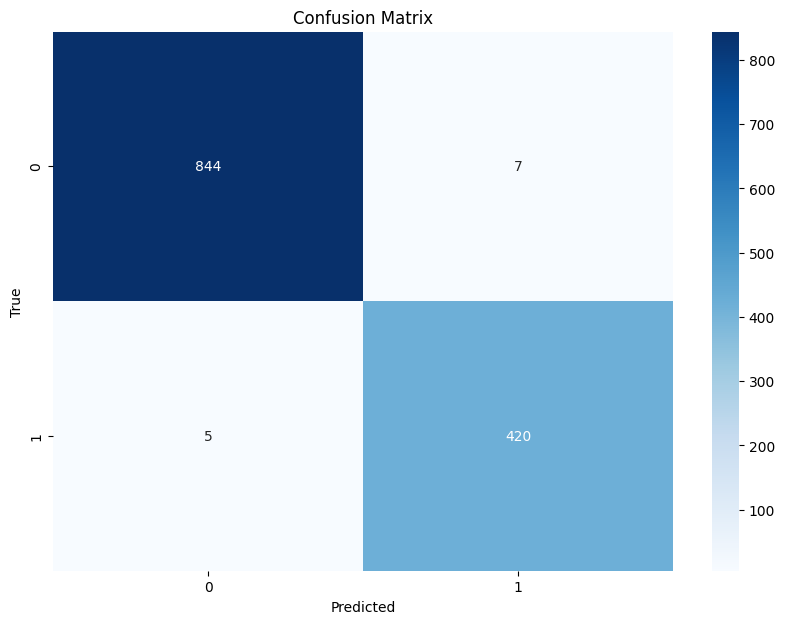

In [43]:
conf = confusion_matrix(res['act'], res['pred'])
#the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
#accuracy
metrics.accuracy_score(res['act'], res['pred'])

0.9905956112852664

In [45]:
#prediction error =
1 - metrics.accuracy_score(res['act'], res['pred'])

0.009404388714733591

In [46]:
#recall / tpr
metrics.recall_score(res['act'], res['pred'])

0.9882352941176471

In [47]:
#tnr
(conf[0, 0]) / conf[0,:].sum()

0.9917743830787309

In [48]:
#f1 score
f1_score(res['act'], res['pred'])

0.9859154929577465

In [49]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(res['act'], res['prob'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)


In [50]:
roc_auc_score(res['act'], res['prob'] )

0.9980756203774107

our model is doing very well, we have a high accuracy, recall, true negative rate, and our ROC curve looks very good

# v) random forest and KNN 

## random forest

we will use a random forest classifier to predict if a student will improve their score or not

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import metrics


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [52]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
2579                      23          64            7               55   
3696                      27          64            5               70   
3592                      19          77            5               90   
6182                      11          97            8               76   
2145                      28          80            8               61   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
2579                  0                  4          65   
3696                  0                  4          65   
3592                  1                  3          65   
6182                  2                  2          69   
2145                  1                  3          68   

      Parental_Involvement_High  Parental_Involvement_Low  \
2579                      False                     False   
3696                      False                      True   
3592                      False                      True   
6182                      False                     False   
2145                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
2579                         True  ...                      False   
3696                        False  ...                      False   
3592                        False  ...                      False   
6182                         True  ...                      False   
2145                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
2579                             False                                  True   
3696                             False                                  True   
3592                              True                                 False   
6182                             False                                  True   
2145                              True                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
2579                                  False                   False   
3696                                  False                   False   
3592                                  False                   False   
6182                                  False                   False   
2145                                  False                    True   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
2579                         True                    False          False   
3696                        False                     True           True   
3592                        False                     True           True   
6182                         True                    False           True   
2145                        False                    False           True   

      Gender_Male  Score_Change  
2579         True            10  
3696        False            -5  
3592        False           -25  
6182        False            -7  
2145        False             7  

[5 rows x 42 columns]

In [53]:
y = df["Score_Change"] > 0
y.sample(5)

1668    False
2756    False
6316    False
3615     True
5990    False
Name: Score_Change, dtype: bool

In [54]:
X = df.drop(columns=["Exam_Score", "Score_Change"])
X.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
3243                       9          89            7               91   
860                       28          94            7               80   
353                       22          65            6               85   
5054                      22          78            6               92   
5                         19          88            8               89   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
3243                  1                  3                      False   
860                   3                  4                      False   
353                   2                  3                      False   
5054                  1                  3                       True   
5                     3                  3                      False   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
3243                      True                        False   
860                      False                         True   
353                       True                        False   
5054                     False                        False   
5                        False                         True   

      Access_to_Resources_High  ...  Learning_Disabilities_No  \
3243                      True  ...                      True   
860                       True  ...                      True   
353                       True  ...                     False   
5054                      True  ...                      True   
5                        False  ...                      True   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
3243                      False                             False   
860                       False                             False   
353                        True                             False   
5054                      False                             False   
5                         False                             False   

      Parental_Education_Level_High School  \
3243                                 False   
860                                  False   
353                                  False   
5054                                  True   
5                                    False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
3243                                   True                   False   
860                                    True                    True   
353                                    True                   False   
5054                                  False                   False   
5                                      True                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
3243                        False                     True          False   
860                         False                    False          False   
353                         False                     True           True   
5054                         True                    False          False   
5                           False                     True          False   

      Gender_Male  
3243         True  
860          True  
353         False  
5054         True  
5            True  

[5 rows x 40 columns]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

our model is doing very well, we have a high accuracy, recall, true negative rate, and our ROC curve looks very good

In [56]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define a parameter grid for max_depth (tree depth)
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, None]  # None means no limit (<=40)
}

# Set up GridSearchCV to find the best max_depth using cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=25)

In [57]:
best_rf = best_model
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=25)

our cross validation says that a depth of 5 produces the best result

evaluating our random forest

In [58]:
res = pd.DataFrame(dict(
  act = y_test, 
  pred = best_rf.predict(x_test),
  prob = best_rf.predict_proba(x_test)[:,1]
))
res.sample(5)

act   pred  prob
5433  False  False  0.09
3381   True   True  0.73
1993   True   True  0.80
4929  False  False  0.15
1152   True  False  0.45

In [59]:
best_rf.score(x_test, y_test)

0.9623824451410659

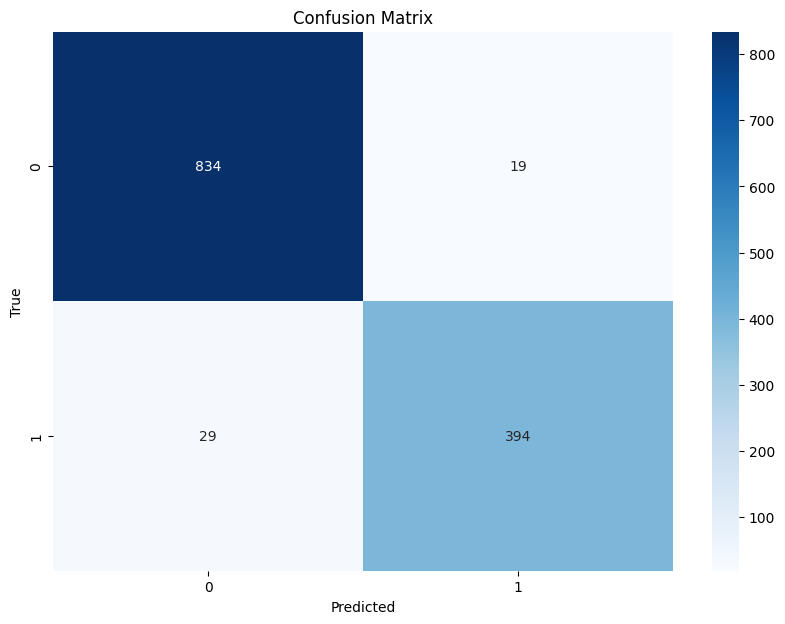

In [60]:

conf = confusion_matrix(res['act'], res['pred'])
#the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [61]:
#accuracy
metrics.accuracy_score(res['act'], res['pred'])

0.9623824451410659

In [62]:
#prediction error =
1 - metrics.accuracy_score(res['act'], res['pred'])

0.037617554858934144

In [63]:
#recall / tpr
metrics.recall_score(res['act'], res['pred'])

0.9314420803782506

In [64]:
#tnr
(conf[0, 0]) / conf[0,:].sum()

0.977725674091442

In [65]:
#f1 score
metrics.f1_score(res['act'], res['pred'])

0.9425837320574163

In [66]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(res['act'], res['prob'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Random Forest'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)


In [67]:
roc_auc_score(res['act'], res['prob'] )

0.9896166776139838

Our Random Forest's performance is comparable to logistic regression, albeit slightly worse. 

## KNN

In [68]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix


import matplotlib.pyplot as plt
import plotly.express as px

In [69]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
2534                      28          87            4               62   
1294                      11          84            6               76   
4203                      14          97            5               83   
2865                      22          84            8               90   
3288                      19          65            9               60   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
2534                  2                  4          73   
1294                  3                  3          67   
4203                  0                  2          68   
2865                  2                  2          70   
3288                  1                  3          63   

      Parental_Involvement_High  Parental_Involvement_Low  \
2534                       True                     False   
1294                       True                     False   
4203                      False                     False   
2865                      False                     False   
3288                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
2534                        False  ...                      False   
1294                        False  ...                      False   
4203                         True  ...                      False   
2865                         True  ...                      False   
3288                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
2534                             False                                  True   
1294                             False                                  True   
4203                             False                                  True   
2865                              True                                 False   
3288                             False                                 False   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
2534                                  False                   False   
1294                                  False                   False   
4203                                  False                   False   
2865                                  False                   False   
3288                                   True                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
2534                        False                     True           True   
1294                         True                    False           True   
4203                        False                     True           True   
2865                        False                     True           True   
3288                         True                    False          False   

      Gender_Male  Score_Change  
2534        False            11  
1294        False            -9  
4203        False           -15  
2865        False           -20  
3288         True             3  

[5 rows x 42 columns]

In [70]:
y = df["Score_Change"] > 0

X = df.drop(columns=["Exam_Score", "Score_Change"])

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

x_scaled = scaled_df
x_scaled.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
0                0.505278    0.344803    -0.023928        -0.143302   
1               -0.163081   -1.387019     0.657282        -1.115616   
2                0.672367    1.557079    -0.023928         1.106816   
3                1.507815    0.777759     0.657282         1.592974   
4               -0.163081    1.037532    -0.705139        -0.698910   

   Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
0          -1.212085           0.026518                      False   
1           0.409708           0.998406                      False   
2           0.409708           0.998406                      False   
3          -0.401188           0.998406                      False   
4           1.220605           0.998406                      False   

   Parental_Involvement_Low  Parental_Involvement_Medium  \
0                      True                        False   
1                      True                        False   
2                     False                         True   
3                      True                        False   
4                     False                         True   

   Access_to_Resources_High  ...  Learning_Disabilities_No  \
0                      True  ...                      True   
1                     False  ...                      True   
2                     False  ...                      True   
3                     False  ...                      True   
4                     False  ...                      True   

   Learning_Disabilities_Yes  Parental_Education_Level_College  \
0                      False                             False   
1                      False                              True   
2                      False                             False   
3                      False                             False   
4                      False                              True   

   Parental_Education_Level_High School  \
0                                  True   
1                                 False   
2                                 False   
3                                  True   
4                                 False   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                  False                   False   
1                                  False                   False   
2                                   True                   False   
3                                  False                   False   
4                                  False                   False   

   Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
0                        False                     True          False   
1                         True                    False           True   
2                        False                     True          False   
3                         True                    False          False   
4                        False                     True           True   

   Gender_Male  
0         True  
1        False  
2         True  
3         True  
4        False  

[5 rows x 40 columns]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

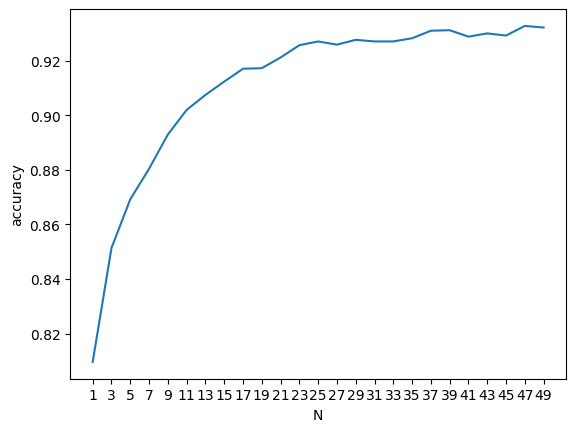

Optimal number of neighbors (K): 47


In [72]:
k_vals = range(1,51,2) # range from 1 to 50 neighbors (step size of 2)

cv_score = []

# Perform CV
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_score.append(np.mean(scores))

# Plot the cross-validation results
plt.plot(k_vals, cv_score)
plt.xlabel("N")
plt.xticks(k_vals)
plt.ylabel("accuracy")
plt.show()

# Find the optimal k (the value with the lowest negative MSE)
optimal_k = k_vals[np.argmax(cv_score)]
print(f"Optimal number of neighbors (K): {optimal_k}")


In [73]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=47)

In [74]:
res = pd.DataFrame(dict(
  act = y_test, 
  pred = knn.predict(x_test),
  prob = knn.predict_proba(x_test)[:,1]
))
res.sample(5)

act   pred      prob
2647  False  False  0.127660
3115   True   True  0.936170
2008  False  False  0.361702
802    True   True  0.531915
395    True   True  0.829787

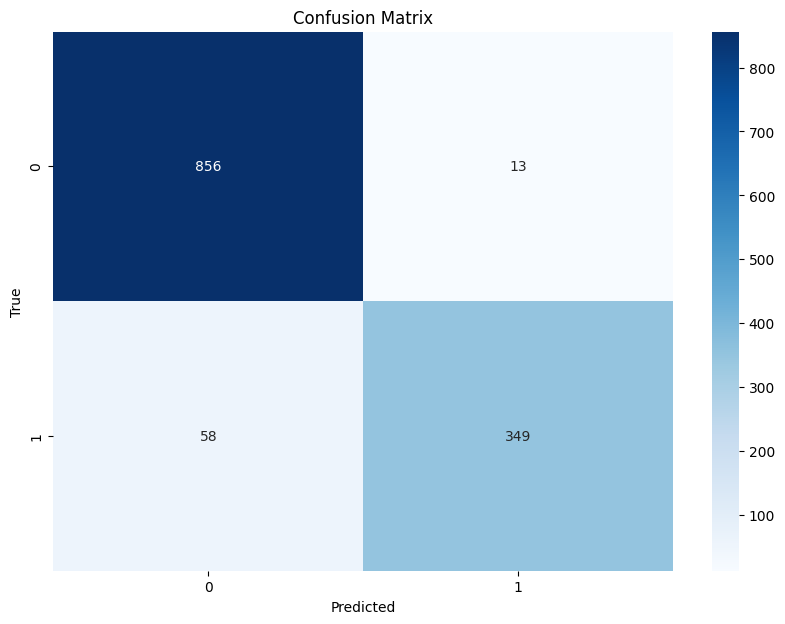

In [75]:
conf = confusion_matrix(res['act'], res['pred'])
#the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
plt.figure(figsize=(10, 7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [76]:
#accuracy
metrics.accuracy_score(res['act'], res['pred'])

0.9443573667711599

In [77]:
#prediction error =
1 - metrics.accuracy_score(res['act'], res['pred'])

0.05564263322884011

In [78]:
#recall / tpr
metrics.recall_score(res['act'], res['pred'])

0.8574938574938575

In [79]:
#tnr
(conf[0, 0]) / conf[0,:].sum()

0.9850402761795167

In [80]:
#f1 score
metrics.f1_score(res['act'], res['pred'])

0.9076723016905072

In [81]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(res['act'], res['prob'])

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'KNN'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)

In [82]:
roc_auc_score(res['act'], res['prob'] )

0.9858489098995429

similar to Random Forest, KNN does a good job at fitting the data, but is slightly worse than logistic regression

# vi) PCA and Clustering

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px

In [13]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
2465                      15          74            8               76   
1963                      26          91            7               57   
2782                       7          64            9               70   
1984                      17          76            7               81   
2049                      20          86            7               53   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
2465                  1                  4          64   
1963                  3                  3          72   
2782                  4                  4          59   
1984                  4                  2          65   
2049                  1                  2          65   

      Parental_Involvement_High  Parental_Involvement_Low  \
2465                       True                     False   
1963                       True                     False   
2782                      False                     False   
1984                      False                     False   
2049                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
2465                        False  ...                      False   
1963                        False  ...                      False   
2782                         True  ...                       True   
1984                         True  ...                      False   
2049                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
2465                             False                                  True   
1963                              True                                 False   
2782                             False                                  True   
1984                             False                                  True   
2049                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
2465                                  False                    True   
1963                                  False                   False   
2782                                  False                    True   
1984                                  False                   False   
2049                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
2465                        False                    False          False   
1963                        False                     True          False   
2782                        False                    False          False   
1984                        False                     True          False   
2049                        False                     True          False   

      Gender_Male  Score_Change  
2465         True           -12  
1963         True            15  
2782         True           -11  
1984         True           -16  
2049         True            12  

[5 rows x 42 columns]

## PCA

we will perform pca on our prediction data
- we will mean center and standard-deviation scale our data (excluding categorical variables)

In [14]:
# important that we drop our response variable
scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])

numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
# setting one-hot columns to ints 
scaled_df[scaled_df.select_dtypes(include=['bool']).columns] = scaled_df.select_dtypes(include=['bool']).astype(int)
scaled_df.sample(5)


Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
95                  0.338188   -1.387019    -0.023928         1.592974   
2945               -1.332708   -0.694291    -0.705139        -1.740675   
2578               -0.664349    0.864350    -0.705139         1.037365   
2042               -0.998529    0.085030     0.657282        -0.282204   
3380                0.004009   -0.001562    -0.023928        -1.185067   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
95            -0.401188           0.026518                          0   
2945          -0.401188           0.026518                          0   
2578           0.409708           0.026518                          1   
2042          -0.401188           0.026518                          0   
3380          -1.212085          -0.945369                          0   

      Parental_Involvement_Low  Parental_Involvement_Medium  \
95                           1                            0   
2945                         0                            1   
2578                         0                            0   
2042                         1                            0   
3380                         0                            1   

      Access_to_Resources_High  ...  Learning_Disabilities_No  \
95                           0  ...                         1   
2945                         0  ...                         1   
2578                         0  ...                         1   
2042                         0  ...                         0   
3380                         1  ...                         1   

      Learning_Disabilities_Yes  Parental_Education_Level_College  \
95                            0                                 0   
2945                          0                                 1   
2578                          0                                 0   
2042                          1                                 0   
3380                          0                                 1   

      Parental_Education_Level_High School  \
95                                       1   
2945                                     0   
2578                                     1   
2042                                     0   
3380                                     0   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
95                                        0                       0   
2945                                      0                       0   
2578                                      0                       0   
2042                                      1                       0   
3380                                      0                       0   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
95                              0                        1              0   
2945                            0                        1              0   
2578                            0                        1              0   
2042                            0                        1              1   
3380                            0                        1              1   

      Gender_Male  
95              1  
2945            1  
2578            1  
2042            0  
3380            0  

[5 rows x 40 columns]

In [15]:
u,s,vh = np.linalg.svd(scaled_df)
v = vh.T

[(0, 0.34164038591161594),
 (1, 0.054980265136858955),
 (2, 0.054105467500842254),
 (3, 0.053757040115614364),
 (4, 0.05229492277328973),
 (5, 0.051204281680537304),
 (6, 0.04992622714839374),
 (7, 0.0257939572878531),
 (8, 0.0255166732602858),
 (9, 0.022419319023245815),
 (10, 0.02196114883364197),
 (11, 0.021553872465941273),
 (12, 0.02080358687271321),
 (13, 0.02069495589560597),
 (14, 0.020452909291477094),
 (15, 0.020240841605596346),
 (16, 0.01964549663184825),
 (17, 0.01948570514261525),
 (18, 0.013152406051659385),
 (19, 0.012541141418314264),
 (20, 0.012293992222875721),
 (21, 0.012246264589144969),
 (22, 0.011841568381625566),
 (23, 0.011521646616405085),
 (24, 0.009414940418501033),
 (25, 0.007083543138350393),
 (26, 0.00704908036024405),
 (27, 0.006378360224903195),
 (28, 6.737668602257329e-32),
 (29, 6.348469833783414e-33),
 (30, 5.606404457244697e-33),
 (31, 3.5803746434875684e-33),
 (32, 2.7414215619206324e-33),
 (33, 2.5343221491236437e-33),
 (34, 2.395452805479779e-33)

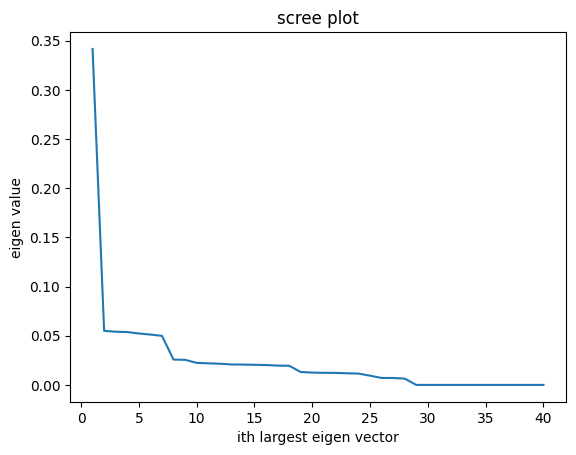

In [16]:
vars = np.square(s)
total_var = np.sum(vars)
"total variance", total_var
percent_var = vars/total_var
plt.plot(range(1, len(percent_var) + 1), percent_var)
plt.title("scree plot")
plt.ylabel("eigen value")
plt.xlabel("ith largest eigen vector")
list(enumerate(percent_var))


from our scree plot, we see that first principal component has the highest variation while most others have less variation.

In [17]:
sum(percent_var[:16])

0.857345854803513

to reduce the dimensionality of the data, we will only use principal components with a proportion of variance >=0.2: the first 16 PC's account for 86 % of the variability

In [18]:
# put the loadings for PC1 in a data frame
loadings1 = pd.DataFrame(
    {"feature": scaled_df.columns,
     "pc1_loading": vh[0]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings1.reindex(loadings1["pc1_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

feature  pc1_loading
18             Internet_Access_Yes    -0.364970
30        Learning_Disabilities_No    -0.354694
26              School_Type_Public    -0.277202
24          Teacher_Quality_Medium    -0.240007
37         Distance_from_Home_Near    -0.238291
13  Extracurricular_Activities_Yes    -0.236386
39                     Gender_Male    -0.229028
8      Parental_Involvement_Medium    -0.203650
16         Motivation_Level_Medium    -0.202746
11      Access_to_Resources_Medium    -0.200517

In [19]:
# put the loadings for PC2 in a data frame
loadings2 = pd.DataFrame(
    {"feature": scaled_df.columns,
     "pc2_loading": vh[1]
     })
# look at the 10 largest (absolute value) loadings for PC2 but print out the signed value
loadings2.reindex(loadings2["pc2_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

feature  pc2_loading
1                             Attendance    -0.530130
0                 Hours_Studied_Per_Week     0.489049
3                        Previous_Scores     0.482920
4                      Tutoring_Sessions    -0.431940
2                            Sleep_Hours     0.228748
5                      Physical_Activity     0.075047
33  Parental_Education_Level_High School     0.021219
32      Parental_Education_Level_College    -0.013745
37               Distance_from_Home_Near    -0.013512
21                  Family_Income_Medium     0.011317

In [20]:
vh_k = vh[:16]
vh_k.shape #expect 16x #features

(16, 40)

In [21]:
pca_scaled= scaled_df @ vh_k.T
pca_scaled.columns = ["PC" + str(1 + col) for col in pca_scaled.columns]
pca_scaled.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.676485  0.538157 -0.440957  0.559043 -0.057349  1.041448 -0.069853   
1 -2.414635  0.186480  2.128333 -0.071981  0.288688 -0.080515 -0.576401   
2 -2.936074 -0.092377 -0.536675 -0.868524 -1.384697  0.527511  1.464263   
3 -2.734005  1.526738 -0.349569 -0.467300 -1.456618  0.592148  1.408511   
4 -2.783703 -1.587723  0.466373 -0.972204 -0.841322  0.419609  0.165178   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.092106  0.889637  0.323765  0.808319  0.317358  1.253110  0.148344   
1 -1.095563  0.015274  1.049080 -0.059895  0.953623 -0.942496 -0.051327   
2  0.721905  0.030121  0.273992 -1.289016 -0.007083  0.001521 -0.352508   
3  0.816131 -0.288614  0.755524 -0.108265  0.401408 -0.127678 -0.932815   
4 -0.422203 -0.748037  0.136526 -1.212818 -1.093185 -0.771911  0.300216   

       PC15      PC16  
0 -0.995196 -0.160808  
1  0.180975  0.250144  
2  0.605619  0.452852  
3  0.586114 -0.340108  
4  0.638477  0.233082

In [22]:
colors = ["improved" if a else "did not improve" for a in df["Score_Change"] > 0]
px.scatter(pca_scaled, x="PC1", y="PC2", color = colors)

In [23]:
colors = ["improved" if a else "did not improve" for a in df["Score_Change"] > 0]
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color = colors)

There seems to be decent separated with a bit of overlap
- however, this might be because we are projecting into a smaller dimension. The data might be better separated in the higher dimensional space

## Clustering

In [24]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score

we will cluster the PCA-Transformed data
- we have already seen in our 3d scatter of the PC's that the data has begun to seperate, so using the PCA-transformed data should help

We know that our data should have two distinct clusters - "improved score" and "did not improve score", so we will use two clusters
- we will compare the quality of kmeans and agglomerative clustering and how well they relate to the actual labels

In [25]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(pca_scaled)
kmeans.cluster_centers_

array([[-2.53992877e+00,  5.14763132e-01,  3.67532164e-01,
        -1.37913821e-01,  3.39467822e-01, -2.39369884e-01,
        -3.54835887e-01, -1.96113167e-03, -8.17050444e-03,
        -2.12644467e-02,  1.18784967e-02,  5.87918094e-03,
        -1.58009468e-02,  1.29689158e-02, -7.29620469e-04,
        -2.33729503e-03],
       [-2.53539940e+00, -5.40171057e-01, -3.85618318e-01,
         1.47059586e-01, -3.55628740e-01,  2.48173415e-01,
         3.73396075e-01, -2.11069235e-02,  9.26495987e-03,
        -1.50984442e-03,  1.95059720e-02, -2.62770940e-03,
        -1.94111932e-02,  5.38456718e-03,  6.90001677e-04,
        -1.53396043e-02]])

In [26]:
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=y_kmeans, title="K means separation of data")

In [27]:
same_diff = y_kmeans==(df["Score_Change"] > 0).astype('int')
prop = sum(same_diff)/len(same_diff)
print(max(prop, 1-prop))
same_diff = ["same" if s else "diff" for s in same_diff] 
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=same_diff, title="KMeans consistency with data (should expect one color dominant)")


0.5640583346401129


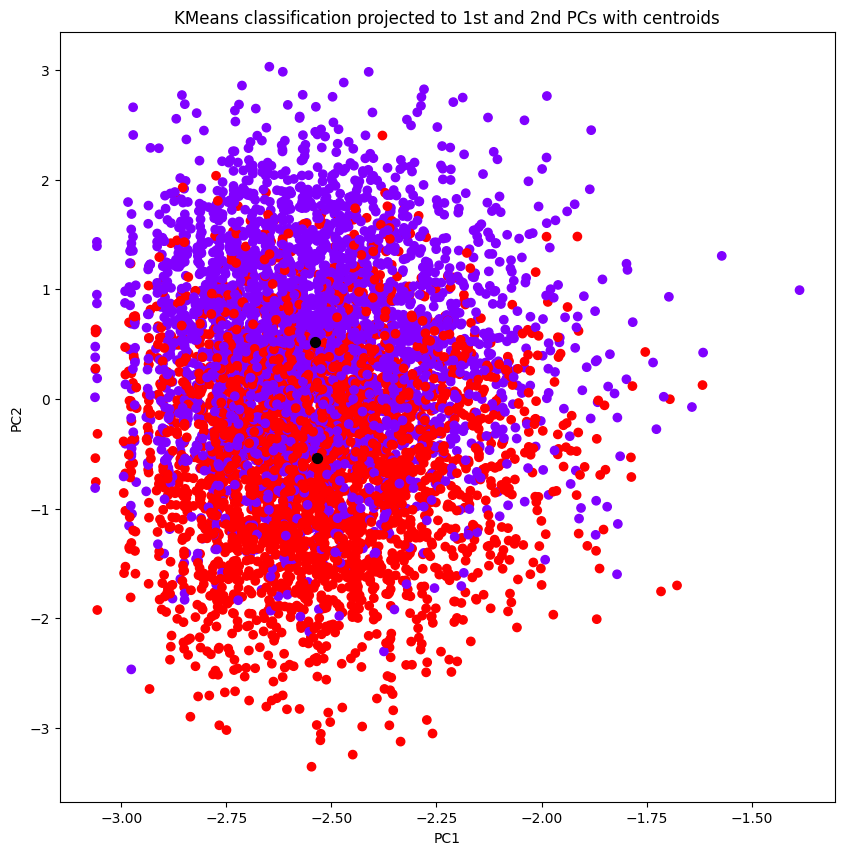

In [28]:
plt.figure(figsize=(10,10))
# Using average drive and fairway p
plt.scatter(pca_scaled['PC1'], pca_scaled['PC2'], c = y_kmeans, cmap='rainbow')
centroids = kmeans.cluster_centers_
plt.scatter(centroids [:, 0], centroids[:, 1], c='black', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans classification projected to 1st and 2nd PCs with centroids")
plt.show()


k means has done a good job of separating the data. Furthermore, since we have the labels we can also see that the clustering has done a good job of creating clusters that actually reflect the labels (which we did not provide)

In [29]:
hclust = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hclust_labels = hclust.fit(pca_scaled).labels_

In [30]:
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=hclust_labels, title="Agglomerative clustering separation of data")

In [31]:
same_diff = hclust_labels==(df["Score_Change"] > 0).astype('int')
prop = sum(same_diff)/len(same_diff)
print(max(prop, 1-prop))
same_diff = ["same" if s else "diff" for s in same_diff] 
px.scatter_3d(pca_scaled, x="PC1", y="PC2", z="PC3", color=same_diff, title="Agglomerative clustering consistency with data (should expect one color dominant)")


0.569233181746903


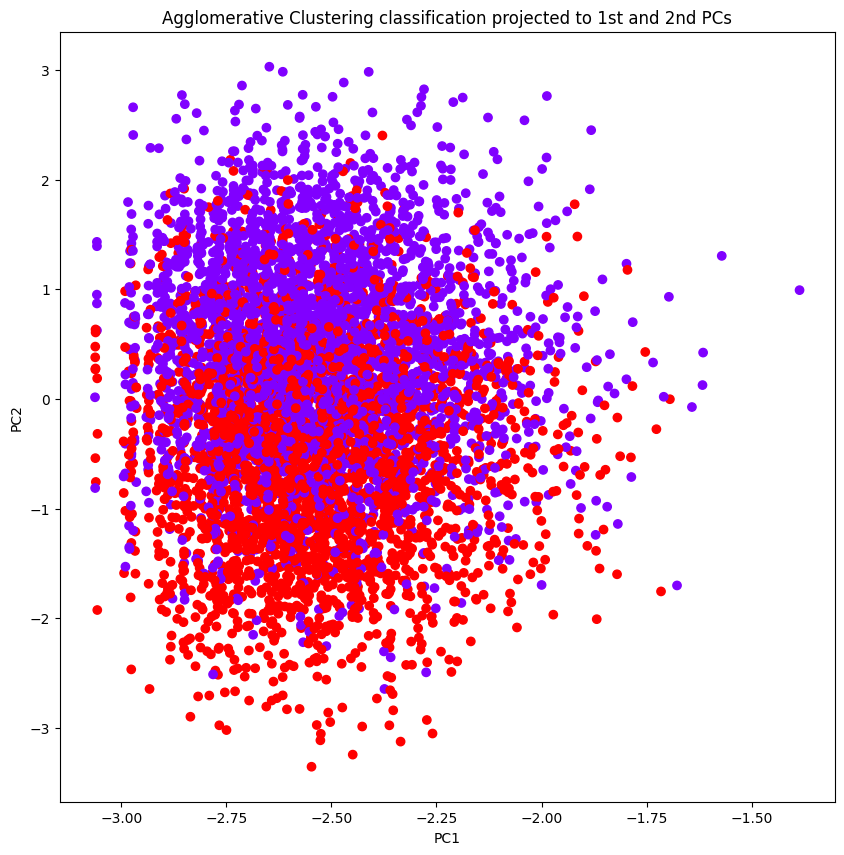

In [32]:
plt.figure(figsize=(10,10))
# Using average drive and fairway p
plt.scatter(pca_scaled['PC1'], pca_scaled['PC2'], c = hclust_labels, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Clustering classification projected to 1st and 2nd PCs")
plt.show()


agglomerative clustering seems to do a worse job of seperating data and matching the labels

### comparing clustering

In [33]:
kmeans.inertia_

58001.86698717489

In [34]:
silhouette_score(pca_scaled, y_kmeans)

0.07507644406826537

In [35]:
silhouette_score(pca_scaled, hclust_labels)

0.04615634225246989

both have low silhouette scores implying the clusters are close together, mixed
- this reflects what we saw in graphs

In [36]:
rand_score(y_kmeans, hclust_labels)

0.6788974020303912

In [37]:
adjusted_rand_score(y_kmeans, hclust_labels)

0.35779417090727367

a high rand score implies they are clustering in similar ways

### conclusion

Clustering can be useful in cases where we do not have labels for unsupervised machine learning methods. When clustering our data, it was interesting to see that clustering the PCA-transformed data was able to create clusters that matched up well with our dataset. However, since we do have labels for our data, clustering is not a very appropriate tool to be using. 


PCA has proven to be much more useful. With PCA, we are able to reduce the dimension of our data from 40 features to 16 principal components. Furthermore these principal components help separate the data for us too. PCA is useful to reduce computation costs and process the data

# vii)viii) Neural Networks and hyperparameter tuning

In [109]:
import numpy as np
import pandas as pd
import plotly.express as px

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn import metrics

In [110]:
df = pd.read_csv("transformed_data.csv")
df.sample(5)

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
545                       17          83            7               70   
5140                      20          68            8               88   
6086                      19          93            7               84   
3749                      21          63            7               63   
2652                      21          72            9               80   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
545                   3                  5          68   
5140                  5                  3          63   
6086                  0                  2          68   
3749                  2                  2          63   
2652                  1                  3          66   

      Parental_Involvement_High  Parental_Involvement_Low  \
545                        True                     False   
5140                      False                      True   
6086                      False                     False   
3749                       True                     False   
2652                      False                     False   

      Parental_Involvement_Medium  ...  Learning_Disabilities_Yes  \
545                         False  ...                      False   
5140                        False  ...                      False   
6086                         True  ...                      False   
3749                        False  ...                      False   
2652                         True  ...                      False   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
545                              False                                 False   
5140                             False                                  True   
6086                              True                                 False   
3749                             False                                  True   
2652                             False                                  True   

      Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
545                                    True                   False   
5140                                  False                   False   
6086                                  False                   False   
3749                                  False                    True   
2652                                  False                   False   

      Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
545                         False                     True           True   
5140                         True                    False          False   
6086                        False                     True          False   
3749                        False                    False          False   
2652                        False                     True           True   

      Gender_Male  Score_Change  
545         False            -2  
5140         True           -25  
6086         True           -16  
3749         True             0  
2652        False           -14  

[5 rows x 42 columns]

we will create a NN for predicting if a students score improves or not

In [111]:
y = (df["Score_Change"] > 0).astype('int')
y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)
y_tensor


tensor([[0.],
        [1.],
        [0.],
        ...,
        [1.],
        [0.],
        [0.]])

In [112]:
X = df.drop(columns=["Exam_Score", "Score_Change"])

scaled_df = df.copy().drop(columns=["Exam_Score", "Score_Change"])
numerical_cols = scaled_df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
scaled_df[scaled_df.select_dtypes(include=['bool']).columns] = scaled_df.select_dtypes(include=['bool']).astype(int)

x_scaled = scaled_df
x_tensor = torch.tensor(x_scaled.values, dtype=torch.float32)
x_scaled.head()

Hours_Studied_Per_Week  Attendance  Sleep_Hours  Previous_Scores  \
0                0.505278    0.344803    -0.023928        -0.143302   
1               -0.163081   -1.387019     0.657282        -1.115616   
2                0.672367    1.557079    -0.023928         1.106816   
3                1.507815    0.777759     0.657282         1.592974   
4               -0.163081    1.037532    -0.705139        -0.698910   

   Tutoring_Sessions  Physical_Activity  Parental_Involvement_High  \
0          -1.212085           0.026518                          0   
1           0.409708           0.998406                          0   
2           0.409708           0.998406                          0   
3          -0.401188           0.998406                          0   
4           1.220605           0.998406                          0   

   Parental_Involvement_Low  Parental_Involvement_Medium  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         1                            0   
4                         0                            1   

   Access_to_Resources_High  ...  Learning_Disabilities_No  \
0                         1  ...                         1   
1                         0  ...                         1   
2                         0  ...                         1   
3                         0  ...                         1   
4                         0  ...                         1   

   Learning_Disabilities_Yes  Parental_Education_Level_College  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 0   
3                          0                                 0   
4                          0                                 1   

   Parental_Education_Level_High School  \
0                                     1   
1                                     0   
2                                     0   
3                                     1   
4                                     0   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                      0                       0   
1                                      0                       0   
2                                      1                       0   
3                                      0                       0   
4                                      0                       0   

   Distance_from_Home_Moderate  Distance_from_Home_Near  Gender_Female  \
0                            0                        1              0   
1                            1                        0              1   
2                            0                        1              0   
3                            1                        0              0   
4                            0                        1              1   

   Gender_Male  
0            1  
1            0  
2            1  
3            1  
4            0  

[5 rows x 40 columns]

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor)

In [114]:
class SimpleNN(nn.Module):
    def __init__(self, insize, hidden_size): 
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(insize, hidden_size)
        self.relu1 = nn.ReLU()
        self.out = nn.Linear(hidden_size, 1)
        self.sigmoid_out = nn.Sigmoid()
    def forward(self, x):
        zh = self.hidden1(x)
        ah = self.relu1(zh)
        z_out = self.out(ah)
        a_out = self.sigmoid_out(z_out)
        return a_out
        

In [115]:
n_features = x_tensor.shape[1]
model = SimpleNN(n_features, int(n_features**(1/2))) #geo mean hidden layer size
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [116]:
def train(model, loss_fn, optimizer, epochs=100):
    for epoch in range(epochs):
      prediction = model(x_train)
      loss = loss_fn(prediction, y_train)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if(epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

train(model, loss_fn, optimizer)

Epoch [10/100], Loss: 0.5546
Epoch [20/100], Loss: 0.4776
Epoch [30/100], Loss: 0.3983
Epoch [40/100], Loss: 0.3240
Epoch [50/100], Loss: 0.2611
Epoch [60/100], Loss: 0.2150
Epoch [70/100], Loss: 0.1828
Epoch [80/100], Loss: 0.1604
Epoch [90/100], Loss: 0.1443
Epoch [100/100], Loss: 0.1323


this is our simple model, we will now select hyper parameters

In [117]:
kf = KFold(n_splits=5, shuffle=True)
learning_rates = [1e-5,1e-4,1e-3,1e-2,1e-1,1]
hidden_layer_options = range(6,41,4) # 40 input, 1 ouput, considering on range [in dim, sqrt(in dim)]


In [118]:
best_score = np.inf
def train_and_evaluate(hidden_dim, learning_rate):
    fold_scores = []
    for train_idx, val_idx in kf.split(x_tensor):
        X_train, X_val = x_tensor[train_idx], x_tensor[val_idx]
        y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

        # create model, loss, optimizer
        model = SimpleNN(X.shape[1], hidden_dim)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Training
        for epoch in range(10):  
            model.train()
            optimizer.zero_grad()
            predictions = model(X_train)
            loss = criterion(predictions, y_train)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = criterion(val_predictions, y_val).item()
            fold_scores.append(val_loss) 

    return np.mean(fold_scores)


for hidden_dim in hidden_layer_options:
    for lr in learning_rates:
            avg_score = train_and_evaluate(hidden_dim, lr)
            print(f"Params: hidden_dim={hidden_dim}, lr={lr}, avg_score={avg_score:.4f}")

            # get min loss/score
            if avg_score < best_score:
                best_score = avg_score
                best_params = {'hidden_dim': hidden_dim, 'lr': lr}

# Best hyperparameters
print(f"Best Params: {best_params} with score: {best_score:.4f}")


Params: hidden_dim=6, lr=1e-05, avg_score=0.6878
Params: hidden_dim=6, lr=0.0001, avg_score=0.7434
Params: hidden_dim=6, lr=0.001, avg_score=0.6766
Params: hidden_dim=6, lr=0.01, avg_score=0.5662
Params: hidden_dim=6, lr=0.1, avg_score=0.3899
Params: hidden_dim=6, lr=1, avg_score=14.3315
Params: hidden_dim=10, lr=1e-05, avg_score=0.6954
Params: hidden_dim=10, lr=0.0001, avg_score=0.6958
Params: hidden_dim=10, lr=0.001, avg_score=0.6672
Params: hidden_dim=10, lr=0.01, avg_score=0.5554
Params: hidden_dim=10, lr=0.1, avg_score=0.2963
Params: hidden_dim=10, lr=1, avg_score=13.1200
Params: hidden_dim=14, lr=1e-05, avg_score=0.6973
Params: hidden_dim=14, lr=0.0001, avg_score=0.7304
Params: hidden_dim=14, lr=0.001, avg_score=0.6706
Params: hidden_dim=14, lr=0.01, avg_score=0.5328
Params: hidden_dim=14, lr=0.1, avg_score=0.3412
Params: hidden_dim=14, lr=1, avg_score=39.6469
Params: hidden_dim=18, lr=1e-05, avg_score=0.7029
Params: hidden_dim=18, lr=0.0001, avg_score=0.6962
Params: hidden_dim=1

In [119]:
model = SimpleNN(x_tensor.shape[1], best_params['hidden_dim'])
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])
train(model, loss_fn, optimizer)

Epoch [10/100], Loss: 0.4954
Epoch [20/100], Loss: 0.3177
Epoch [30/100], Loss: 0.2005
Epoch [40/100], Loss: 0.1376
Epoch [50/100], Loss: 0.1059
Epoch [60/100], Loss: 0.0922
Epoch [70/100], Loss: 0.0853
Epoch [80/100], Loss: 0.0814
Epoch [90/100], Loss: 0.0790
Epoch [100/100], Loss: 0.0774


evaluating model

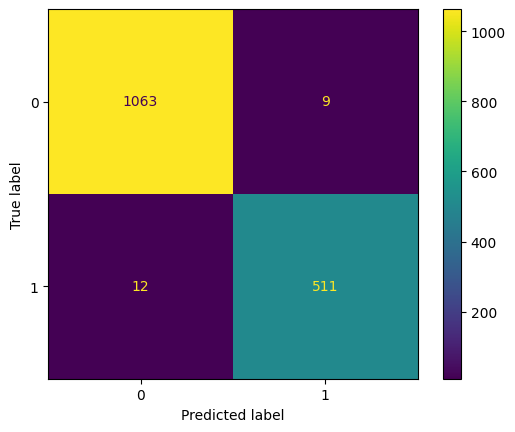

In [120]:
with torch.no_grad():
    pred = model(x_test)
pred_class = pred > 0.5
metrics.ConfusionMatrixDisplay(confusion_matrix(y_test==1, pred_class)).plot()


In [121]:
accuracy_score(y_test, pred_class )

0.986833855799373

In [122]:
precision_score(y_test, pred_class)

0.9826923076923076

In [123]:
recall_score(y_test, pred_class)

0.9770554493307839

In [124]:
f1_score(y_test, pred_class)

0.9798657718120806

In [125]:
#ROC
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(y_test, pred)

roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Neural Network'
}, index=lr_thresholds_sample)


roc_sample_df = pd.concat([roc_lr_sample])


px.line(roc_lr_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)


In [126]:
roc_auc_score(y_test, pred)

0.9926568163009047

our NN performs very well, but also on par with our logistic regression method.